# Marks Molecule Calculations Code

# Startup

## Imports

In [1]:
import numpy as np
np.set_printoptions(precision=3,suppress=True,linewidth=100000, edgeitems=10000)
from sympy.physics.quantum.cg import CG
import matplotlib.font_manager
import pandas as pd
import math
import scipy.linalg
import IPython.display
import matplotlib.pyplot as plt
import MarksConstants as mc
import Miscellaneous as misc
import matplotlib.style
import matplotlib as mpl
from scipy import linalg
import copy
matplotlib.style.use('default')
pd.set_option("max_colwidth", 200)
from importlib import reload

In [2]:
import time

The important import!

In [3]:
import MoleculeCalculation as mol

## Constants

In [4]:
E_HFS_5S12_F1F2 = (mc.Rb87_Ground_ToF2-mc.Rb87_Ground_ToF1)/2
E_HFS_5P12_F1F2 = (mc.Rb87_5P12_ToF2-mc.Rb87_5P12_ToF1)/2
E_FS_5P12_5P32 = mc.h*(mc.Rb87_D2LineFrequency-mc.Rb87_D1LineFrequency)# / mc.h

transFreq = 2*np.pi*(mc.Rb87_D2LineFrequency+mc.Rb87_D1LineFrequency)/2
lifetime = (mc.Rb87_D1_Lifetime+mc.Rb87_D2_Lifetime)/2
C_3_val_alt = 3*mc.hbar*mc.c**3/(4*lifetime*transFreq**3)# * 1e27 / mc.h

C_3_val = mc.Rb87_C3
print(E_FS_5P12_5P32, C_3_val)
print("From first principles one can calculate C3 to be: ", C_3_val_alt, "but this differs from the literature value which is: ", C_3_val)

4.7197635548748796e-21 5.94492796981645e-48
From first principles one can calculate C3 to be:  5.774794407751793e-48 but this differs from the literature value which is:  5.94492796981645e-48


A = 2/V**(3/2)

# Calculations

In [5]:
def lsi_to_ji_op(lsi_basis, ji_basis):
    op = np.zeros((len(lsi_basis),len(ji_basis))) 
    for lsi_num, lsi_state in enumerate(lsi_basis): 
        for ji_num, ji_state in enumerate(ji_basis):
            op[ji_num,lsi_num] = 1
            if (lsi_state['l_a'] != ji_state['l_a'] or lsi_state['l_b'] != ji_state['l_b'] or lsi_state['s_a'] != ji_state['s_a'] 
                or lsi_state['s_b'] != ji_state['s_b'] or lsi_state['i_a'] != ji_state['i_a'] or lsi_state['i_b'] != ji_state['i_b']):
                op[ji_num,lsi_num] *= 0
            else:
                op[ji_num,lsi_num] *= (float(CG(lsi_state['l_a'], lsi_state['m_l_a'], lsi_state['s_a'], lsi_state['m_s_a'], ji_state['j_a'], ji_state['m_j_a']).doit())
                                       *float(CG(lsi_state['l_b'], lsi_state['m_l_b'], lsi_state['s_b'], lsi_state['m_s_b'], ji_state['j_b'], ji_state['m_j_b']).doit()))
    return op

In [6]:
lsi2ToJi2_Op = mol.create_lsi2ToJi2_Op(lsiBasis2Atom,jiBasis2Atom)
# lsi_to_ji = lsi_to_ji_op(lsiBasis2Atom,jiBasis2Atom)
true = []
for i in lsi_to_ji:
    for j in lsi2ToJi2_Op:
        if all(i)==all(j):
            match = 'true'
            true.append(match)
        else:
            continue
print('matches',len(true))
# print(np.shape(lsi2ToJi2_Op))
# for i in lsi_to_ji:
#     print(i)
print(1024*1024)

NameError: name 'lsiBasis2Atom' is not defined

## Create the relevant bases

### Create Atomic Bases

these are the ordinary single-atom bases that you'd use to describe your atom if you didn't know anything about the molecular symmetries.

In [8]:
def ji_to_f_op(ji_basis, f_basis):
    op = np.zeros((len(ji_basis),len(f_basis)))
    for j_num, ji_state in enumerate(ji_basis):
        for f_num, f_state in enumerate(f_basis):
            op[f_num,j_num] = 1
            if (f_state['l_a'] != ji_state['l_a'] or f_state['l_b'] != ji_state['l_b'] or f_state['s_a'] != f_state['s_a'] 
                or f_state['s_b'] != ji_state['s_b'] or f_state['i_a'] != ji_state['i_a'] or f_state['i_b'] != ji_state['i_b']
                or f_state['j_a'] != ji_state['j_a'] or f_state['j_b'] != ji_state['j_b'] ):
                op[f_num,j_num] *= 0            
            else:
                op[fnum, jnum] *=(float(CG(ji_state['j_a'], ji_state['m_j_a'],ji_state['i_a'], ji_state['m_i_a'],f_state['f_a'], f_state['m_f_a']).doit())
                                       *float(CG(ji_state['j_b'], ji_state['m_j_b'],ji_state['i_b'], ji_state['m_i_b'],f_state['f_b'], f_state['m_f_b']).doit()))
    return op

In [9]:
jiToF_Op = mol.create_jiToF_Op(jiBasis, fBasis)
ji2ToF2_Op = mol.create_(jiBasis, fBasis)

NameError: name 'jiBasis' is not defined

In [83]:
lsiBasis, jiBasis, fBasis, lsiBasis2Atom, jiBasis2Atom, fBasis2Atom = mol.createAtomicBases([0,1], [1/2], [3/2])
lsiToJi_Op = mol.create_lsiToJi_Op(lsiBasis,jiBasis)
jiToF_Op = mol.create_jiToF_Op(jiBasis, fBasis)

ls_basis,j_basis,f_basis = create_seperate_atom_bases([0,1],[1/2],[3/2])
#lsi2ToJi2_Op = mol.create_lsi2ToJi2_Op(lsiBasis2Atom,jiBasis2Atom)
#ji2ToF2_Op = mol.create_(jiBasis, fBasis)

# caseAMostlySymHfs = mol.createCaseABasis_MostlySym([1],[0,1], [3/2], I_BOvals=['g', 'u'])
# caseASymHfs = mol.createCaseABasis_Sym([1],[0,1],[3/2], I_BOvals=['g','u'])
print('Mark basis',len(fBasis2Atom))
print('steven basis',len(f_basis))
true = []
for i in fBasis2Atom:
    for j in f_basis:
        if i==j:
            match = 'true'
            true.append(match)
        else:
            continue
print('matches',len(true))

Mark basis 1024
steven basis 1024
matches 1024


In [92]:
expandedBOBasis = mol.addFsRelevantStates(mol.boStates)
caseASymHfs = mol.addHfsRelevantStates(expandedBOBasis)
print(len(expandedBOBasis))
print(caseASymHfs[2])
print(len(caseASymHfs))
for i in caseASymHfs:
    print(i)

16
{'L': 1, '|Lambda|': 0, 'S': 1, 'I_BO': 'g', 'kappa_BO': 1, '|Sigma|': 0, 'kappa_FS': 1, '|Omega|': 0, '|Phi|': 0.0, 'I': 1.0, '|Iota|': 0.0, 'i_a': 1.5, 'i_b': 1.5, 'kappa_HFS': -1.0}
230
{'L': 1, '|Lambda|': 0, 'S': 1, 'I_BO': 'g', 'kappa_BO': 1, '|Sigma|': 0, 'kappa_FS': 1, '|Omega|': 0, '|Phi|': 0.0, 'I': 0.0, '|Iota|': 0.0, 'i_a': 1.5, 'i_b': 1.5, 'kappa_HFS': 1.0}
{'L': 1, '|Lambda|': 0, 'S': 1, 'I_BO': 'g', 'kappa_BO': 1, '|Sigma|': 0, 'kappa_FS': 1, '|Omega|': 0, '|Phi|': 1.0, 'I': 1.0, '|Iota|': 1.0, 'i_a': 1.5, 'i_b': 1.5, 'kappa_HFS': 1.0}
{'L': 1, '|Lambda|': 0, 'S': 1, 'I_BO': 'g', 'kappa_BO': 1, '|Sigma|': 0, 'kappa_FS': 1, '|Omega|': 0, '|Phi|': 0.0, 'I': 1.0, '|Iota|': 0.0, 'i_a': 1.5, 'i_b': 1.5, 'kappa_HFS': -1.0}
{'L': 1, '|Lambda|': 0, 'S': 1, 'I_BO': 'g', 'kappa_BO': 1, '|Sigma|': 0, 'kappa_FS': 1, '|Omega|': 0, '|Phi|': 2.0, 'I': 2.0, '|Iota|': 2.0, 'i_a': 1.5, 'i_b': 1.5, 'kappa_HFS': 1.0}
{'L': 1, '|Lambda|': 0, 'S': 1, 'I_BO': 'g', 'kappa_BO': 1, '|Sigma|': 

In [93]:
def create_sym_BO_states(l_a,l_b,s_a,s_b,i_a,i_b):
    sym_BO_states = []
    L = l_a + l_b
    I_vals = np.arange(abs(i_a-i_b),i_a+i_b+1,1)
    for Lmbda in [0,L]:
        for S in [0,s_a + s_b]:
            for Sigma in np.arange(-np.max(S),np.max(S)+1,1):
                Omega = Sigma+Lmbda
                for I in I_vals:
                    for Iota in np.arange(-I,I+1,1):
                        Phi = Iota+Omega
                        for chi in [1,-1]:
                            if Lmbda == 1 and Sigma == -1: # 3Pi states --> Omega=0
                                for kappa_fs in [-1,1]:
                                    bostates = {'L':int(L),'|Lambda|':abs(Lmbda),'S':int(S),'|Sigma|':int(abs(Sigma)),
                                                               '|Omega|':int(abs(Omega)),'chi':chi, 'kappa_fs':kappa_fs,
                                                                '|Phi|':int(abs(Phi)),'I':int(I), '|Iota|':int(abs(Iota)), 'i_a':i_a, 'i_b':i_b}  
                                    sym_BO_states.append(bostates)
                            elif Sigma>=0: 
                                
                                kappa_fs = chi*(-1)**((L)-Lmbda+(S)-Sigma)
                                bostates = {'L':int(l_a+l_b),'|Lambda|':abs(Lmbda),'S':int(S),'|Sigma|':int(abs(Sigma)),
                                                           '|Omega|':int(abs(Omega)),'chi':chi, 'kappa_fs':int(kappa_fs),
                                                            '|Phi|':int(abs(Phi)),'I':int(I), '|Iota|':int(abs(Iota)), 'i_a':i_a, 'i_b':i_b}            
                                sym_BO_states.append(bostates)
    
    return sym_BO_states    

In [94]:
sym_BO_states = create_sym_BO_states(0,1,1/2,1/2,3/2,3/2)
print('\033[1m' + 'BO States'+ '\033[0m')
print('number of symmetrized BO states: ',len(sym_BO_states))
for state in sym_BO_states:
    print(state)

BO States
number of symmetrized BO states:  256
{'L': 1, '|Lambda|': 0, 'S': 0, '|Sigma|': 0, '|Omega|': 0, 'chi': 1, 'kappa_fs': -1, '|Phi|': 0, 'I': 0, '|Iota|': 0, 'i_a': 1.5, 'i_b': 1.5}
{'L': 1, '|Lambda|': 0, 'S': 0, '|Sigma|': 0, '|Omega|': 0, 'chi': -1, 'kappa_fs': 1, '|Phi|': 0, 'I': 0, '|Iota|': 0, 'i_a': 1.5, 'i_b': 1.5}
{'L': 1, '|Lambda|': 0, 'S': 0, '|Sigma|': 0, '|Omega|': 0, 'chi': 1, 'kappa_fs': -1, '|Phi|': 1, 'I': 1, '|Iota|': 1, 'i_a': 1.5, 'i_b': 1.5}
{'L': 1, '|Lambda|': 0, 'S': 0, '|Sigma|': 0, '|Omega|': 0, 'chi': -1, 'kappa_fs': 1, '|Phi|': 1, 'I': 1, '|Iota|': 1, 'i_a': 1.5, 'i_b': 1.5}
{'L': 1, '|Lambda|': 0, 'S': 0, '|Sigma|': 0, '|Omega|': 0, 'chi': 1, 'kappa_fs': -1, '|Phi|': 0, 'I': 1, '|Iota|': 0, 'i_a': 1.5, 'i_b': 1.5}
{'L': 1, '|Lambda|': 0, 'S': 0, '|Sigma|': 0, '|Omega|': 0, 'chi': -1, 'kappa_fs': 1, '|Phi|': 0, 'I': 1, '|Iota|': 0, 'i_a': 1.5, 'i_b': 1.5}
{'L': 1, '|Lambda|': 0, 'S': 0, '|Sigma|': 0, '|Omega|': 0, 'chi': 1, 'kappa_fs': -1, '|Phi|':

note that as the two particle bases are kronicker-products of the one-particle basis, they include doubly-excited atoms with $L_a = L_b = 1$

In [7]:
structureList = [lsiBasis, jiBasis, fBasis, lsiBasis2Atom, jiBasis2Atom, fBasis2Atom, caseAMostlySymHfs, caseASymHfs, lsiToJi_Op, jiToF_Op]

basisDesc = pd.DataFrame()
basisDesc["Size"] = [np.array(base).shape for base in structureList]
basisDesc["Keys"] = [str([r"$"+key + "$" for key in base[0].keys()]) for base in structureList[:-2]] + ["N/A", "N/A"]
basisDesc["Example Value"] = [base[0] for base in structureList]
basisDesc.index = ["lsiBasis", "jiBasis", "fBasis", "lsiBasis2Atom", "jiBasis2Atom", "fBasis2Atom", "caseAMostlySymHfs", "caseASymHfs", "lsiToJi_Op", "jiToF_Op"]
display(basisDesc)

,Size,Keys,Example Value
lsiBasis,"(32,)","['$l_x$', '$m_l_x$', '$s_x$', '$m_s_x$', '$i_x$', '$m_i_x$']","{'l_x': 0, 'm_l_x': 0, 's_x': 0.5, 'm_s_x': -0.5, 'i_x': 1.5, 'm_i_x': -1.5}"
jiBasis,"(32,)","['$j_x$', '$m_j_x$', '$l_x$', '$s_x$', '$i_x$', '$m_i_x$']","{'j_x': 0.5, 'm_j_x': -0.5, 'l_x': 0, 's_x': 0.5, 'i_x': 1.5, 'm_i_x': -1.5}"
fBasis,"(32,)","['$f_x$', '$m_f_x$', '$j_x$', '$l_x$', '$s_x$', '$i_x$']","{'f_x': 1.0, 'm_f_x': -1.0, 'j_x': 0.5, 'l_x': 0, 's_x': 0.5, 'i_x': 1.5}"
lsiBasis2Atom,"(1024,)","['$l_a$', '$m_l_a$', '$s_a$', '$m_s_a$', '$i_a$', '$m_i_a$', '$l_b$', '$m_l_b$', '$s_b$', '$m_s_b$', '$i_b$', '$m_i_b$']","{'l_a': 0, 'm_l_a': 0, 's_a': 0.5, 'm_s_a': -0.5, 'i_a': 1.5, 'm_i_a': -1.5, 'l_b': 0, 'm_l_b': 0, 's_b': 0.5, 'm_s_b': -0.5, 'i_b': 1.5, 'm_i_b': -1.5}"
jiBasis2Atom,"(1024,)","['$j_a$', '$m_j_a$', '$l_a$', '$s_a$', '$i_a$', '$m_i_a$', '$j_b$', '$m_j_b$', '$l_b$', '$s_b$', '$i_b$', '$m_i_b$']","{'j_a': 0.5, 'm_j_a': -0.5, 'l_a': 0, 's_a': 0.5, 'i_a': 1.5, 'm_i_a': -1.5, 'j_b': 0.5, 'm_j_b': -0.5, 'l_b': 0, 's_b': 0.5, 'i_b': 1.5, 'm_i_b': -1.5}"
fBasis2Atom,"(1024,)","['$f_a$', '$m_f_a$', '$j_a$', '$l_a$', '$s_a$', '$i_a$', '$f_b$', '$m_f_b$', '$j_b$', '$l_b$', '$s_b$', '$i_b$']","{'f_a': 1.0, 'm_f_a': -1.0, 'j_a': 0.5, 'l_a': 0, 's_a': 0.5, 'i_a': 1.5, 'f_b': 1.0, 'm_f_b': -1.0, 'j_b': 0.5, 'l_b': 0, 's_b': 0.5, 'i_b': 1.5}"
caseAMostlySymHfs,"(384,)","['$L$', '$Lambda$', '$I_BO$', '$S$', '$Sigma$', '$I$', '$Iota$', '$i_a$', '$i_b$', '$Omega$', '$Phi$']","{'L': 1, 'Lambda': 0, 'I_BO': 'g', 'S': 0, 'Sigma': 0, 'I': 0.0, 'Iota': -0.0, 'i_a': 1.5, 'i_b': 1.5, 'Omega': 0, 'Phi': 0.0}"
caseASymHfs,"(230,)","['$L$', '$|Lambda|$', '$S$', '$I_BO$', '$kappa_BO$', '$|Sigma|$', '$kappa_FS$', '$|Omega|$', '$|Phi|$', '$I$', '$|Iota|$', '$i_a$', '$i_b$', '$kappa_HFS$']","{'L': 1, '|Lambda|': 0, 'S': 1, 'I_BO': 'g', 'kappa_BO': 1, '|Sigma|': 0, 'kappa_FS': 1, '|Omega|': 0, '|Phi|': 0.0, 'I': 0.0, '|Iota|': 0.0, 'i_a': 1.5, 'i_b': 1.5, 'kappa_HFS': 1.0}"
lsiToJi_Op,"(32, 32)",N/A,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
jiToF_Op,"(32, 32)",N/A,"[0.0, -0.5, 0.0, 0.0, 0.8660254037844386, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


### Create $\phi = 0$ Bases

I need to sort the states in the complete basis "caseASymHfs" by their symmetry label so that I can calculate the different symmetries separately and label them appropriately at the end.

In [140]:
phi=0
totalSpatialParityIncluded = ['a','b']
symmetrizedBases = {}
for totalSpatialParity in totalSpatialParityIncluded:
    totalSpatialParityVal = 1 if totalSpatialParity == 'a' else -1
    for state in caseASymHfs:
        I_BOval = mol.g if state['I_BO'] == 'g' else mol.u
        if math.isclose(abs(state['|Phi|']),phi):
            if (-1)**(state['I']+I_BOval) == totalSpatialParityVal:
                kappa_HFS_ParityStr = '1' if state['kappa_HFS'] == 1 else '2'
                symmetryLabel = str(phi) + totalSpatialParity + kappa_HFS_ParityStr
                if symmetryLabel not in symmetrizedBases:
                    symmetrizedBases[symmetryLabel] = []
                symmetrizedBases[symmetryLabel].append(state)
for label,i in symmetrizedBases.items():
    print(label,i)
# print(symmetrizedBases)

0a1 [{'L': 1, '|Lambda|': 0, 'S': 1, 'I_BO': 'g', 'kappa_BO': 1, '|Sigma|': 0, 'kappa_FS': 1, '|Omega|': 0, '|Phi|': 0.0, 'I': 0.0, '|Iota|': 0.0, 'i_a': 1.5, 'i_b': 1.5, 'kappa_HFS': 1.0}, {'L': 1, '|Lambda|': 0, 'S': 1, 'I_BO': 'g', 'kappa_BO': 1, '|Sigma|': 0, 'kappa_FS': 1, '|Omega|': 0, '|Phi|': 0.0, 'I': 2.0, '|Iota|': 0.0, 'i_a': 1.5, 'i_b': 1.5, 'kappa_HFS': 1.0}, {'L': 1, '|Lambda|': 0, 'S': 1, 'I_BO': 'g', 'kappa_BO': 1, '|Sigma|': 1, 'kappa_FS': -1, '|Omega|': 1, '|Phi|': 0.0, 'I': 2.0, '|Iota|': 1.0, 'i_a': 1.5, 'i_b': 1.5, 'kappa_HFS': 1}, {'L': 1, '|Lambda|': 0, 'S': 1, 'I_BO': 'u', 'kappa_BO': 1, '|Sigma|': 1, 'kappa_FS': -1, '|Omega|': 1, '|Phi|': 0.0, 'I': 1.0, '|Iota|': 1.0, 'i_a': 1.5, 'i_b': 1.5, 'kappa_HFS': 1}, {'L': 1, '|Lambda|': 0, 'S': 1, 'I_BO': 'u', 'kappa_BO': 1, '|Sigma|': 1, 'kappa_FS': -1, '|Omega|': 1, '|Phi|': 0.0, 'I': 3.0, '|Iota|': 1.0, 'i_a': 1.5, 'i_b': 1.5, 'kappa_HFS': 1}, {'L': 1, '|Lambda|': 0, 'S': 0, 'I_BO': 'u', 'kappa_BO': 1, '|Sigma|': 0,

### Create $\phi = 1$ through $5$ Bases

In [15]:
phiIncluded=np.arange(1,6)
totalSpatialParityIncluded = ['a','b']
mostlySymmetrizedBases = {}
for phi in phiIncluded:
    for totalSpatialParity in totalSpatialParityIncluded:
        totalSpatialParityVal = 1 if totalSpatialParity == 'a' else -1
        for state in caseAMostlySymHfs:
            I_BOval = mol.g if state['I_BO'] == 'g' else mol.u
            if math.isclose(abs(state['Phi']),phi):
                if (-1)**(state['I']+I_BOval) == totalSpatialParityVal:
                    label = str(phi) + totalSpatialParity
                    if label not in mostlySymmetrizedBases:
                        mostlySymmetrizedBases[label] = []
                    mostlySymmetrizedBases[label].append(state)

## Fine Structure and Hyperfine Structure Hamiltonians

### Create FS and HFS Hamiltonians for the Atomic Bases

In [129]:
fsH = mol.create_H_FS(jiBasis2Atom)* 2 * E_FS_5P12_5P32 / 3
hfsH = mol.create_H_HFS(fBasis2Atom, E_HFS_5P12_F1F2, E_HFS_5S12_F1F2, mc.Rb87_5P32_ToF3, mc.Rb87_5P32_ToF2, mc.Rb87_5P32_ToF1, mc.Rb87_5P32_ToF0) * mc.h

In [132]:
def create_H_HFS(f_basis, E_5P12_F1F2_splitting, E_HFS_5S12_F1F2_splitting, F3E, F2E, F1E, F0E):
    H_HFS = np.zeros((len(f_basis), len(f_basis)))
    for state_num, state in enumerate(f_basis): 
        A_a_HFS = E_5P12_F1F2_splitting if state["l_a"] == 1 else E_HFS_5S12_F1F2_splitting
        E_a = A_a_HFS/2 * (state['f_a']*(state['f_a']+1)-state['j_a']
                *(state['j_a']+1)-state['i_a']*(state['i_a']+1)) if state['j_a'] != 3/2 else (F3E if state['f_a']==3 else (F2E if state['f_a']==2 else (F1E if state['f_a']==1 else F0E)))
        A_b_HFS = E_5P12_F1F2_splitting if state["l_b"] == 1 else E_HFS_5S12_F1F2_splitting    
        E_b = A_a_HFS/2 * (state['f_b']*(state['f_b']+1)-state['j_b']
                *(state['j_b']+1)-state['i_b']*(state['i_b']+1)) if state['j_b'] != 3/2 else (F3E if state['f_b']==3 else (F2E if state['f_b']==2 else (F1E if state['f_b']==1 else F0E))) 
        H_HFS[state_num,state_num] = E_a + E_b          
    return H_HFS 
E_HFS_5S12_F1F2 = (mc.Rb87_Ground_ToF2-mc.Rb87_Ground_ToF1)/2
E_HFS_5P12_F1F2 = (mc.Rb87_5P12_ToF2-mc.Rb87_5P12_ToF1)/2
E_FS_5P12_5P32 = mc.h*(mc.Rb87_D2LineFrequency-mc.Rb87_D1LineFrequency)# / mc.h
E_HFS_5P32_F3 = mc.Rb87_5P32_ToF3 * mc.h
E_HFS_5P32_F2 = mc.Rb87_5P32_ToF2 * mc.h
E_HFS_5P32_F1 =mc.Rb87_5P32_ToF1 * mc.h
E_HFS_5P32_F0 =mc.Rb87_5P32_ToF0 * mc.h
transFreq = 2*np.pi*(mc.Rb87_D2LineFrequency+mc.Rb87_D1LineFrequency)/2
lifetime = (mc.Rb87_D1_Lifetime+mc.Rb87_D2_Lifetime)/2
C_3_val = mc.Rb87_C3
H_HFS_op = create_H_HFS(f_basis, E_HFS_5P12_F1F2,E_HFS_5S12_F1F2,E_HFS_5P32_F3,E_HFS_5P32_F2,E_HFS_5P32_F1,E_HFS_5P32_F0)
# print(H_FS_op)
print(np.shape(H_HFS_op))
print(np.shape(hfsH))

true = []
for i in H_HFS_op:
    for j in hfsH:
        if all(i)==all(j):
            match = 'true'
            true.append(match)
        else:
            continue
print('matches',len(true))
print(1024*1024)

(1024, 1024)
(1024, 1024)
matches 1048576
1048576


In [141]:
allFsEigvals, _ = np.linalg.eigh(fsH)
fsEigvals = np.array(list(set(allFsEigvals)))
print("Fine-Structure Hamiltonian Eigen-Energies (GHz): ", fsEigvals/(mc.h*1e9))
allHfsEigvals, _ = np.linalg.eigh(hfsH)
hfsEigvals = np.array(list(set(allHfsEigvals)))
print("Hyper-Fine-Structure Hamiltonian Eigen-Energies (GHz): ", hfsEigvals/(mc.h*1e9))


Fine-Structure Hamiltonian Eigen-Energies (GHz):  [-9497.361     0.    -2374.34  -4748.681  4748.681  2374.34 ]
Hyper-Fine-Structure Hamiltonian Eigen-Energies (GHz):  [-0.583  2.757 -4.574 -0.812 -4.502 -0.74  -1.709  2.053 -0.146 -0.375  0.612 -0.303 -0.604  2.49  -0.532  0.5   -0.46   2.261  2.333  0.387 -3.965  5.126 -0.204 -4.078 -0.317 -8.543  0.233 -4.782 -1.021  0.004  0.121  0.076  2.869 -0.108 -4.345 -0.036]


Why are there six eigenvalues of the fine structure hamiltonian? There are only two fine structure manifolds we are actually considering, $5S_{1/2}+5P_{1/2}$ and $5S_{1/2} + 5P_{3/2}$, but the basis itself includes double-ground state and double excited states, so we also see $5S_{1/2}+5S_{1/2},5P_{1/2}+5P_{1/2}, 5P_{1/2}+5P_{3/2},$ and $ 5P_{3/2}+5P_{3/2}$ energies. There is a similar problem with the hyper-fine structure hamiltonian, where we are only going to work with a limited number of the above energies. If we look at the difference between a certain two of these eigenvalues though...

In [12]:
print("From Matrix Eigenvalues (GHz):", (fsEigvals[2]-fsEigvals[0])/(mc.h*1e9))
print("Literature Value (GHz):", mc.Rb87_D2LineFrequency/1e9-mc.Rb87_D1LineFrequency/1e9)

From Matrix Eigenvalues (GHz): 7123.0209685
Literature Value (GHz): 7123.020968500001


we can see that the excited state fine-structure splitting is recovered.

### Create FS and HFS Hamiltonians for each molecular symmetry label

#### $\Phi=0$

In [12]:
H_fs_phi, H_hfs_phi = {}, {}
for label, base in symmetrizedBases.items():
    IPython.display.clear_output(wait=True)
    print('Working on states of symmetry ' + label +". " + str(len(base)) + " states")
    fsStates, hfsStates = [],[]
    for num, state in enumerate(base):
        misc.reportProgress(num, len(base))
        indexes, signs = mol.caseASymHfsToMostlySym(state, caseAMostlySymHfs, indexes=True)
        symHfsState, symFsState = 0, 0
        # construct the correct superposition which will preserve the symmetry of the given base. 
        # This should be only either 1 or 2 iterations in this loop.
        for index, sign in zip(indexes,signs):
            caseAState = caseAMostlySymHfs[index] # alias
            I_BO = mol.g if caseAState["I_BO"] == "g" else mol.u
            nuclearNums = [caseAState['I'], caseAState['Iota'],caseAState['i_a'],caseAState['i_b']]
            oalNums = (caseAState["L"], caseAState["Lambda"], 1, 0) # oal = "orbital angular momentum"
            spinNums = (caseAState["S"], caseAState["Sigma"], 1/2, 1/2)
            symHfsState += sign * mol.caseAToAtomic( oalNums, spinNums, nuclearNums, I_BO, lsiBasis, basisChange=jiToF_Op@lsiToJi_Op )
            symFsState += sign * mol.caseAToAtomic( oalNums, spinNums, nuclearNums, I_BO, lsiBasis, basisChange=lsiToJi_Op )
        fsStates.append(symFsState / np.sqrt(len(indexes)));
        hfsStates.append(symHfsState / np.sqrt(len(indexes)))
    # now that I know the atomic representation of all the caseA states, 
    # I can create the fine structure and hyperfine structure hamiltonian for this set of caseA states. 
    H_fs_phi[label] = mol.convertH_toCaseABasis( fsStates, fsH, offset = -1/2* 2 * E_FS_5P12_5P32 / 3)
    H_hfs_phi[label] = mol.convertH_toCaseABasis( hfsStates, hfsH, offset=0)

Working on states of symmetry 0b1. 19 states


#### debugging (ignore for now)

In [ ]:
caseAToLsi_ = mol.genCaseAToLsiTransform2(symmetrizedBases['0b1'], lsiBasis2Atom, caseAMostlySymHfs).T

In [ ]:
caseAToLsi = mol.genCaseAToLsiTransform2(base, lsiBasis2Atom, caseAMostlySymHfs).T

In [ ]:
H_fs_phi, H_hfs_phi = {}, {}
for label, base in symmetrizedBases.items():
    IPython.display.clear_output(wait=True)
    print('Working on states of symmetry ' + label +". " + str(len(base)) + " states")
    fsStates, hfsStates = [],[]
    for num, state in enumerate(base):
        misc.reportProgress(num, len(base))
        indexes, signs = mol.caseASymHfsToMostlySym(state, caseAMostlySymHfs, indexes=True)
        symHfsState, symFsState = 0, 0
        # construct the correct superposition which will preserve the symmetry of the given base. 
        # This should be only either 1 or 2 iterations in this loop.
        for index, sign in zip(indexes,signs):
            caseAState = caseAMostlySymHfs[index] # alias
            I_BO = mol.g if caseAState["I_BO"] == "g" else mol.u
            nuclearNums = [caseAState['I'], caseAState['Iota'],caseAState['i_a'],caseAState['i_b']]
            oalNums = (caseAState["L"], caseAState["Lambda"], 1, 0) # oal = "orbital angular momentum"
            spinNums = (caseAState["S"], caseAState["Sigma"], 1/2, 1/2)
            symHfsState += sign * mol.caseAToAtomic( oalNums, spinNums, nuclearNums, I_BO, lsiBasis, basisChange=jiToF_Op@lsiToJi_Op )
            symFsState += sign * mol.caseAToAtomic( oalNums, spinNums, nuclearNums, I_BO, lsiBasis, basisChange=lsiToJi_Op )
        fsStates.append(symFsState / np.sqrt(len(indexes)));
        hfsStates.append(symHfsState / np.sqrt(len(indexes)))
    # now that I know the atomic representation of all the caseA states, 
    # I can create the fine structure and hyperfine structure hamiltonian for this set of caseA states. 
    #H_fs_phi[label] = mol.convertH_toCaseABasis( fsStates, fsH, offset = -1/2* 2 * E_FS_5P12_5P32 / 3)
    
    caseAToLsi = mol.genCaseAToLsiTransform2(base, lsiBasis2Atom, caseAMostlySymHfs).T
    caseAToJi =  lsi2ToJi2_Op @ caseAToLsi
    H_fs_phi[label] = caseAToJi.T @ fsH @ caseAToJi + np.identity(len(base))*(-1/2* 2 * E_FS_5P12_5P32 / 3)
    H_hfs_phi[label] = mol.convertH_toCaseABasis( hfsStates, hfsH, offset=0)

### end debugging

#### $\Phi=1-5$

The loop for 1-5 is slightly different since these states have one less symmetry.

So if you write down the case-A states as $|L Lambda sigma S Sigma I Iota i_a i_b Omega phi$ then you can classify them as phi i kappa, and then I convert fs and hfs states into this base. that's what I'm doing more or less

In [13]:
for label, base in mostlySymmetrizedBases.items():
    IPython.display.clear_output(wait=True)
    print('Working on states of symmetry ' + label +". " + str(len(base)) + " states")
    fsStates, hfsStates = [[], []]
    for num, state in enumerate(base[:]):
        misc.reportProgress(num, len(base))
        I_BO = mol.g if state["I_BO"] == "g" else mol.u
        nuclearNums = [state['I'], state['Iota'],state['i_a'],state['i_b'],]
        oalNums = (state["L"], state["Lambda"], 1, 0)
        spinNums = (state["S"], state["Sigma"], 1/2, 1/2)
        fsStates.append(mol.caseAToAtomic( oalNums, spinNums, nuclearNums, I_BO, lsiBasis, basisChange=lsiToJi_Op ));
        hfsStates.append(mol.caseAToAtomic( oalNums, spinNums, nuclearNums, I_BO, lsiBasis, basisChange=jiToF_Op@lsiToJi_Op ))
    H_fs_phi[label] = mol.convertH_toCaseABasis( fsStates, fsH, offset=-1/2 * 2 * E_FS_5P12_5P32 / 3)
    H_hfs_phi[label] = mol.convertH_toCaseABasis( hfsStates, hfsH, offset=0)

Working on states of symmetry 5b. 2 states


## Diagonalize the total energy at all distances.

for label, base in mostlySymmetrizedBases.items():
    IPython.display.clear_output(wait=True)
    print('Working on states of symmetry ' + label +". " + str(len(base)) + " states")
    fsStates, hfsStates = [[], []]
    for num, state in enumerate(base[:]):
        misc.reportProgress(num, len(base))
        I_BO = mol.g if state["I_BO"] == "g" else mol.u
        nuclearNums = [state['I'], state['Iota'],state['i_a'],state['i_b'],]
        oalNums = (state["L"], state["Lambda"], 1, 0)
        spinNums = (state["S"], state["Sigma"], 1/2, 1/2)
        fsStates.append(mol.caseAToAtomic( oalNums, spinNums, nuclearNums, I_BO, lsiBasis, basisChange=lsiToJi_Op ));
        hfsStates.append(mol.caseAToAtomic( oalNums, spinNums, nuclearNums, I_BO, lsiBasis, basisChange=jiToF_Op@lsiToJi_Op ))
    H_fs_phi[label] = mol.convertH_toCaseABasis( fsStates, fsH, offset=-1/2 * 2 * E_FS_5P12_5P32 / 3)
    H_hfs_phi[label] = mol.convertH_toCaseABasis( hfsStates, hfsH, offset=0)

In [14]:
symmetrizedBases.keys()

dict_keys(['0a1', '0a2', '0b2', '0b1'])

In [15]:
mostlySymmetrizedBases.keys()

dict_keys(['1a', '1b', '2a', '2b', '3a', '3b', '4a', '4b', '5a', '5b'])

In [16]:
allBases = {**symmetrizedBases, **mostlySymmetrizedBases}
Rvals = np.linspace( 1*20*mc.a0, 100*20*mc.a0, 1000 )
energies = {}
for label, base in allBases.items():
    IPython.display.clear_output(wait=True)
    print('\nLabel:', label, '\nCalcualting Eigenvalues at every R')
    energies[label] = np.zeros((len(Rvals), len(base)))
    for num, rv in enumerate(Rvals):
        misc.reportProgress(num, len(Rvals))
        totalEnergy = mol.get_H_BO(C_3_val, rv, base).astype(float) + H_fs_phi[label] + H_hfs_phi[label]
        eigVals, eigVectors = np.linalg.eigh(totalEnergy)
        energies[label][num] = eigVals


Label: 5b 
Calcualting Eigenvalues at every R


### misc

In [17]:
def getLabelColorAndLinestyle(label):
    phiColors=['purple', 'blue', 'cyan', 'green', 'y', 'red']       
    if label[0] == '0':
        if label[-1] == '1':
            color = 'black'
        elif label[-1] == '2':
            color = '#800080'
    else:
        color = phiColors[int(label[0])]
    linestyle = '-.' if label[1] == 'a' else '-'
    return color, linestyle

In [18]:
for key in H_fs_phi.keys():
    H_fs = H_fs_phi[key]
    H_hfs = H_hfs_phi[key]
    vals, vecs = np.linalg.eig(H_fs+H_hfs)
    v = np.real(vals)/mc.h/1e12
    print(key, H_fs.shape, H_hfs.shape, '\n', set(np.round(v*1e6)/1e6))
    print()

0a1 (19, 19) (19, 19) 
 {0.002261, -0.004345, 0.002757, -0.004502, 0.00249, -7.126986, -7.127803, -7.120152, 0.002333, -7.120968, -0.004078}

0a2 (19, 19) (19, 19) 
 {0.002333, -0.004345, 0.002757, -0.004502, 0.00249, -0.004574, -7.126986, -7.127803, -7.120968, -0.004078, -7.120152}

0b2 (19, 19) (19, 19) 
 {0.002333, -0.004345, 0.002757, -0.004502, 0.00249, -0.004574, -7.126986, -7.120152, -7.120968, -0.004078, -7.127803}

0b1 (19, 19) (19, 19) 
 {0.002261, -0.004345, 0.002757, -0.004502, -7.127803, 0.00249, -7.120152, -7.120968, 0.002333, -7.126986, -0.004078}

1a (68, 68) (68, 68) 
 {0.002261, 0.002333, -0.004345, -7.120152, 0.002757, -0.004502, 0.00249, -0.004574, -7.126986, -7.120968, -0.004078, -7.127803}

1b (68, 68) (68, 68) 
 {0.002261, 0.002333, -0.004345, 0.002757, -0.004502, 0.00249, -0.004574, -7.126986, -7.120968, -7.120152, -0.004078, -7.127803}

2a (48, 48) (48, 48) 
 {0.002261, 0.002333, -0.004345, 0.002757, -0.004502, 0.00249, -7.120968, -7.127803, -7.120152, -0.00407

def fsReflectionOp(basis):
    # expects the 2-atom LSI basis
    op = np.zeros((len(basis),len(basis)))
    names = ['L', 'mL', 'S', 'mS', 'I', 'mI']
    for s1num, state1 in enumerate(basis):
        for s2num, state2 in enumerate(basis):
            val = 1
            for num, name in enumerate(['mL','mS']):
                if state2[name+"_1"] != -state1[name+"_1"] or state2[name+"_2"] != -state1[name+"_2"]:
                    val = 0
            for num, name in enumerate(['L','S','I','mI']):
                if state2[name+"_1"] != state1[name+"_1"] or state2[name+"_2"] != state1[name+"_2"]:
                    val = 0
            op[s1num,s2num] = val
    return op

def hfsReflectionOp(basis):
    # expects the 2-atom LSI basis
    op = np.zeros((len(basis),len(basis)))
    for s1num, state1 in enumerate(basis):
        for s2num, state2 in enumerate(basis):
            val = 1
            for num, name in enumerate(['mL','mS', 'mI']):
                if state2[name+"_1"] != -state1[name+"_1"] or state2[name+"_2"] != -state1[name+"_2"]:
                    val = 0
            for num, name in enumerate(['L','S','I']):
                if state2[name+"_1"] != state1[name+"_1"] or state2[name+"_2"] != state1[name+"_2"]:
                    val = 0
            op[s1num,s2num] = val                        
    return op

# Displaying The Results

## Matplotlib Plotting

### single picture

In [19]:
def getLabelColorAndLinestyle(label):
    phiColors=['purple','purple','purple', 'purple','purple', 'purple']       
    if label[0] == '0':
        if label[-1] == '1':
            color = 'black'
        elif label[-1] == '2':
            color = '#800080'
    else:
        color = phiColors[int(label[0])]
    linestyle = 'dashed' if label[1] == 'b' else 'solid'
    return color, linestyle

In [20]:
for base in H_hfs_phi.values():
    vals, vecs = np.linalg.eig(base)
    v = np.real(vals)/mc.h/1e12
    print(set(np.round(v*1e6)/1e6))

{0.002261, 0.002333, -0.004345, 0.002053, 0.002869, 0.002757, -0.004502, 0.00249, -0.004782, -0.003965, -0.004078}
{0.002053, 0.002333, -0.004345, 0.002869, 0.002757, -0.004502, 0.00249, -0.004782, -0.004574, -0.003965, -0.004078}
{0.002053, 0.002333, -0.004345, 0.002869, 0.002757, -0.004502, 0.00249, -0.004574, -0.004782, -0.003965, -0.004078}
{0.002053, 0.002261, -0.004345, 0.002869, 0.002757, -0.004502, 0.00249, -0.004782, -0.003965, 0.002333, -0.004078}
{0.002261, 0.002053, -0.004345, 0.002333, 0.002869, 0.002757, -0.004502, 0.00249, -0.004574, -0.004782, -0.003965, -0.004078}
{0.002261, 0.002053, -0.004345, 0.002333, 0.002869, 0.002757, -0.004502, 0.00249, -0.004574, -0.004782, -0.003965, -0.004078}
{0.002053, 0.002261, -0.004345, 0.002333, 0.002869, 0.002757, -0.004502, 0.00249, -0.004782, -0.003965, -0.004078}
{0.002261, 0.002053, -0.004345, 0.002333, 0.002869, 0.002757, -0.004502, 0.00249, -0.004782, -0.003965, -0.004078}
{0.002053, -0.004345, 0.002869, 0.002757, 0.00249, -0.00

In [21]:
for base in H_fs_phi.values():
    vals, vecs = np.linalg.eig(base)
    v = np.real(vals)/mc.h/1e12
    print(set(np.round(v*1e6)/1e6))

{-0.0, -7.123021}
{0.0, -7.123021}
{-0.0, -7.123021}
{-0.0, -7.123021}
{0.0, -7.123021}
{0.0, -7.123021}
{0.0, -7.123021}
{0.0, -7.123021}
{0.0, -7.123021}
{0.0, -7.123021}
{0.0, -7.123021}
{0.0, -7.123021}
{-0.0}
{-0.0}


In [22]:
for label in H_fs_phi.keys():
    H_ = H_fs_phi[label] + H_hfs_phi[label]
    vals, vecs = np.linalg.eig(H_)
    v = np.real(vals)/mc.h/1e12
    print(set(np.round(v*1e6)/1e6))

{0.002261, -0.004345, 0.002757, -0.004502, 0.00249, -7.126986, -7.127803, -7.120152, 0.002333, -7.120968, -0.004078}
{0.002333, -0.004345, 0.002757, -0.004502, 0.00249, -0.004574, -7.126986, -7.127803, -7.120968, -0.004078, -7.120152}
{0.002333, -0.004345, 0.002757, -0.004502, 0.00249, -0.004574, -7.126986, -7.120152, -7.120968, -0.004078, -7.127803}
{0.002261, -0.004345, 0.002757, -0.004502, -7.127803, 0.00249, -7.120152, -7.120968, 0.002333, -7.126986, -0.004078}
{0.002261, 0.002333, -0.004345, -7.120152, 0.002757, -0.004502, 0.00249, -0.004574, -7.126986, -7.120968, -0.004078, -7.127803}
{0.002261, 0.002333, -0.004345, 0.002757, -0.004502, 0.00249, -0.004574, -7.126986, -7.120968, -7.120152, -0.004078, -7.127803}
{0.002261, 0.002333, -0.004345, 0.002757, -0.004502, 0.00249, -7.120968, -7.127803, -7.120152, -0.004078, -7.126986}
{0.002261, 0.002333, -0.004345, 0.002757, -0.004502, 0.00249, -7.126986, -7.120968, -7.120152, -0.004078, -7.127803}
{0.002333, -0.004345, 0.002757, 0.00249,

## FS

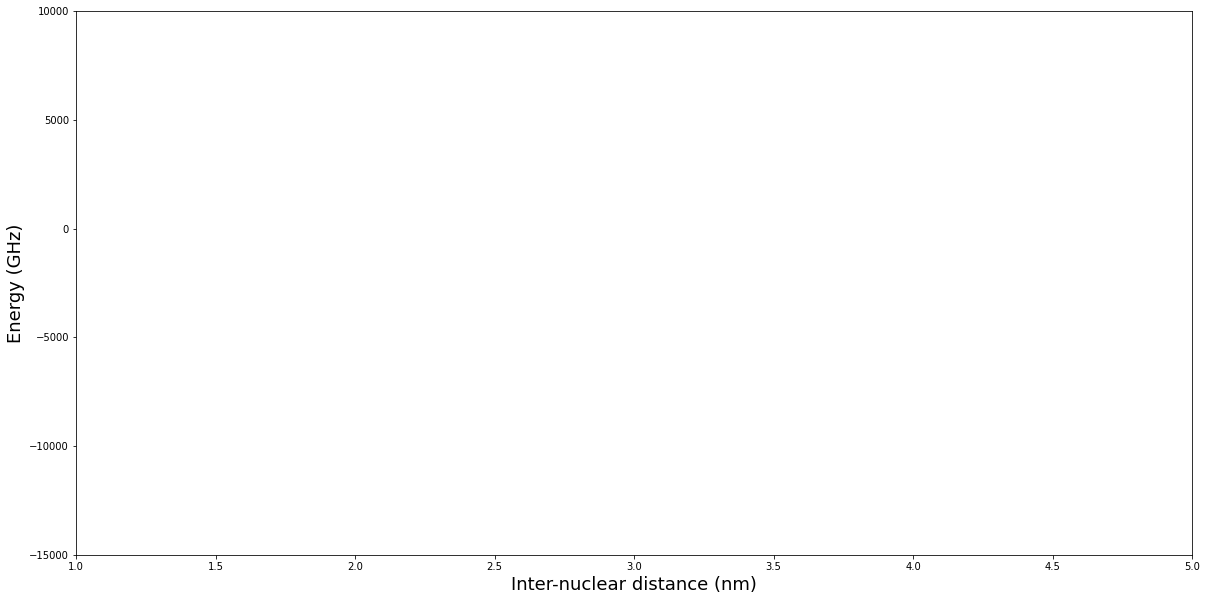

In [23]:
Rval = Rvals
DeltaVal = mc.h*(mc.Rb87_D2LineFrequency-mc.Rb87_D1LineFrequency)
lifetime = (mc.Rb87_D1_Lifetime+mc.Rb87_D2_Lifetime)/2
C_3_val = mc.Rb87_C3

def Extract1(e1):
    return [item[0] for item in e1]

def Extract2(e2):
    return [item[1] for item in e2]

def Extract3(e3):
    return [item[2] for item in e3]

# 0+g
Htot1 = []
for a in Rval:
    H = [C_3_val/a**3 - 2*DeltaVal/3, np.sqrt(2)*DeltaVal/3,np.sqrt(2)*DeltaVal/3,2*C_3_val/a**3 - DeltaVal/3]
    H_mat = np.reshape(H,(2,2))
    w,v = np.linalg.eig(H_mat)
    Htot1.append(w*1e-9/mc.h)

Htot1_list = list(map(list,Htot1))
H1_e1 = Extract1(Htot1_list)
H1_e2 = Extract2(Htot1_list)

# 0+u
Htot2 = []
for a in Rval:
    H = [-C_3_val/a**3 - 2*DeltaVal/3, np.sqrt(2)*DeltaVal/3, np.sqrt(2)*DeltaVal/3,2*C_3_val/a**3 - DeltaVal/3]
    H_mat = np.reshape(H,(2,2))
    w,v = np.linalg.eig(H_mat)
    Htot2.append(w*1e-9/mc.h)
    
Htot2_list = list(map(list,Htot2))
H2_e1 = Extract1(Htot2_list)
H2_e2 = Extract2(Htot2_list)

# 0-g
Htot3 = []
for a in Rval:
    H = [C_3_val/a**3 - 2*DeltaVal/3, np.sqrt(2)*DeltaVal/3,np.sqrt(2)*DeltaVal/3,-2*C_3_val/a**3 - DeltaVal/3]
    H_mat = np.reshape(H,(2,2))
    w,v = np.linalg.eig(H_mat)
    Htot3.append(w*1e-9/mc.h);
    
Htot3_list = list(map(list,Htot3))
H3_e1 = Extract1(Htot3_list)
H3_e2 = Extract2(Htot3_list)
# print(H1_e2)
# print(DeltaVal)

# 0-u
Htot4 = []
for a in Rval:
    H = [-C_3_val/a**3 - 2*DeltaVal/3, -np.sqrt(2)*DeltaVal/3, -np.sqrt(2)*DeltaVal/3,-2*C_3_val/a**3 - DeltaVal/3]
    H_mat = np.reshape(H,(2,2))
    w,v = np.linalg.eig(H_mat)
    Htot4.append(w*1e-9/mc.h)
    
Htot4_list = list(map(list,Htot4))
H4_e1 = Extract1(Htot4_list)
H4_e2 = Extract2(Htot4_list)




# 1g    
Htot5 = []
for a in Rval:
    H = [[C_3_val/a**3 - DeltaVal/3, -DeltaVal/3, DeltaVal/3], [-DeltaVal/3, -C_3_val/a**3 - DeltaVal/3, DeltaVal/3],\
         [DeltaVal/3, DeltaVal/3,-2*C_3_val/a**3 - DeltaVal/3]]
    H_mat = np.reshape(H,(3,3))
    w = linalg.eigvalsh(H_mat)
    Htot5.append(w*1e-9/mc.h)
    
Htot5_list = list(map(list,Htot5))
H5_e1 = Extract1(Htot5_list)
H5_e2 = Extract2(Htot5_list)
H5_e3 = Extract3(Htot5_list)

# 1u    
Htot6 = []
for a in Rval:
    H = [-C_3_val/a**3 - DeltaVal/3, -DeltaVal/3, DeltaVal/3, -DeltaVal/3, C_3_val/a**3 - DeltaVal/3, DeltaVal/3,\
         DeltaVal/3, DeltaVal/3,2*C_3_val/a**3 - DeltaVal/3]
    H_mat = np.reshape(H,(3,3))
    w = linalg.eigvalsh(H_mat)
    Htot6.append(w*1e-9/mc.h)
    
Htot6_list = list(map(list,Htot6))
H6_e1 = Extract1(Htot6_list)
H6_e2 = Extract2(Htot6_list)   
H6_e3 = Extract3(Htot6_list)

#2g    
Htot7 = []
for a in Rval:
    H = C_3_val/a**3
    Htot7.append(H*1e-9/mc.h)

# 2u    
Htot8 = []
for a in Rval:
    H = -C_3_val/a**3
    Htot8.append(H*1e-9/mc.h)
 
# line at zero
Htot9 = []
for a in Rval:
    H = 0
    Htot9.append(H*1e-9/mc.h)

# line below zero
Htot10 = []
for a in Rval:
    H = -7100
    Htot10.append(H)    
    
plt.figure(figsize=(20,10)) 
plt.xlabel("Inter-nuclear distance (nm)",fontsize=18)
plt.ylabel("Energy (GHz)",fontsize=18);
plt.ylim(-15000,10000)
plt.xlim(1,5)
# ax.set_ylim(*ylims)
# ax.set_xlim(min(Rvals)*1e9,max(Rvals)*1e9)


import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

# mpl.rc('font', **font)
# plt.plot(Rval*1e9,H1_e1,color = 'mediumblue',linestyle = ':',label = r'$0_g^+$') ### 0^g- in Marks calc
# plt.plot(Rval*1e9,H1_e2, color = 'mediumblue',linestyle = ':')                   ### 0^g- in Marks calc
# plt.plot(Rval*1e9,H2_e1,color = 'mediumblue', label = r'$0_u^+$')
# plt.plot(Rval*1e9,H2_e2,color = 'mediumblue')
# plt.plot(Rval*1e9,H3_e1,color = 'teal',linestyle = '-.', label = r'$0_g^-$') ### 0^g+ in Marks calc
# plt.plot(Rval*1e9,H3_e2,color = 'teal',linestyle = '-.')                     ### 0^g+ in Marks calc
# plt.plot(Rval*1e9,H4_e1,color = 'mediumturquoise',linestyle = ':', label = r'$0_u^-$')
# plt.plot(Rval*1e9,H4_e2,color = 'mediumturquoise',linestyle = ':')
# plt.plot(Rval*1e9,H5_e1,color = 'mediumseagreen', label = r'$1_g$')
# plt.plot(Rval*1e9,H5_e2,color = 'mediumseagreen')
# plt.plot(Rval*1e9,H5_e3,color = 'mediumseagreen')
# plt.plot(Rval*1e9,H6_e1,color = 'limegreen', linestyle = '-.', label = r'$1_u$')
# plt.plot(Rval*1e9,H6_e2,color = 'limegreen', linestyle = '-.')
# plt.plot(Rval*1e9,H6_e3,color = 'limegreen', linestyle = '-.')
# plt.plot(Rval*1e9,Htot7,color =  'yellow', linestyle = ':',label = r'$2_g$')
# plt.plot(Rval*1e9,Htot8,color = 'yellow', label = r'$2_u$')
# plt.plot(Rval*1e9,Htot9,color = 'lightpink', label = 'F states')
# plt.plot(Rval*1e9,Htot10,color = 'lightpink')
# plt.legend(loc='upper center', mode = "expand", ncol = 8)
# # plt.margins(x=0)
# # from matplotlib.pyplot import figure
# # fig.savefig('FS.png', dpi=100)


### HFS and FS

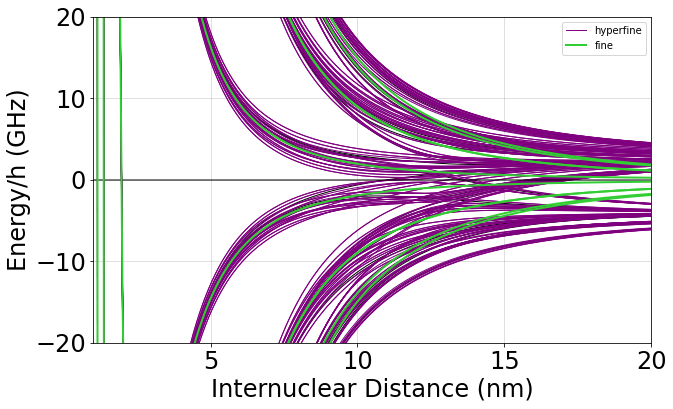

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
fs = 24

fig.subplots_adjust(hspace=0.03, wspace=0.01)

titles = ["D2 Line",  
          r"D2 $f=1$",     r"D2 $f=2$",
          "D1 Line",  
          r"D1 $f=1$",     r"D1 $f=2$"]
allYlims = [(-10,10), 
            (-1,1),    (-1,1),
            (-10,10), 
            (-1,1),    (-1,1)]
yoffsets = np.array(
            [0,
            -mc.Rb87_Ground_ToF1,    -mc.Rb87_Ground_ToF2,
            E_FS_5P12_5P32/mc.h,
            E_FS_5P12_5P32/mc.h-mc.Rb87_Ground_ToF1,E_FS_5P12_5P32/mc.h-mc.Rb87_Ground_ToF2])/1e9
inc=1
labels = ['0a1','0b1','0a2','0b2','1a','1b','2a','2b','3a','3b','4a','4b','5a','5b']
# for num, (ax, title, ylims, yoff) in enumerate(zip(axs, titles, allYlims, yoffsets)):
which = 0
title, ylims, yoff = titles[which], allYlims[which], yoffsets[which]
for label in labels:
    color, linestyle = getLabelColorAndLinestyle(label)
    for datanum, mdata in enumerate(misc.transpose(energies[label])[::inc]):
        ax.plot(Rvals*1e9, np.array(mdata) * 1e-9 / mc.h + yoff , color=color, linestyle='-', linewidth=1, 
                label='hyperfine' if datanum==0 and label=='2b' else None)
leg = ax.legend(fontsize=12, ncol=7, loc='upper center', bbox_to_anchor=(0.5,1.15))
for text in leg.get_texts():
    text.set_color("k")

ax.tick_params(axis='both', which='major', labelsize=fs)

ax.axhline(0,color='k',alpha=0.5)
# ax.text(60,-1.4, title + "\nDissociation Limit", fontsize=fs, color='k')
# ax.set_ylim(*ylims)
# ax.set_xlim(min(Rvals)*1e9,40)
plt.xlim(1,20)
plt.ylim(-20,20)
ax.grid(alpha=0.5)
#if num != len(axs)-1 and num != len(axs)-2 and num != 0:
#    ax.set_xticklabels([]);
#elif num != 0:
ax.set_xlabel('Internuclear Distance (nm)', fontsize=fs)
ax.set_ylabel('Energy/h (GHz)', fontsize=fs)

plt.plot(Rval*1e9,H1_e1,color = 'limegreen',label = 'fine') ### 0^g- in Marks calc
plt.plot(Rval*1e9,H1_e2, color = 'limegreen')                   ### 0^g- in Marks calc
plt.plot(Rval*1e9,H2_e1,color = 'limegreen')
plt.plot(Rval*1e9,H2_e2,color = 'limegreen')
plt.plot(Rval*1e9,H3_e1,color = 'limegreen') ### 0^g+ in Marks calc
plt.plot(Rval*1e9,H3_e2,color = 'limegreen')                     ### 0^g+ in Marks calc
plt.plot(Rval*1e9,H4_e1,color = 'limegreen')
plt.plot(Rval*1e9,H4_e2,color = 'limegreen')
plt.plot(Rval*1e9,H5_e1,color = 'limegreen')
plt.plot(Rval*1e9,H5_e2,color = 'limegreen')
plt.plot(Rval*1e9,H5_e3,color = 'limegreen')
plt.plot(Rval*1e9,H6_e1,color = 'limegreen')
plt.plot(Rval*1e9,H6_e2,color = 'limegreen')
plt.plot(Rval*1e9,H6_e3,color = 'limegreen')
plt.plot(Rval*1e9,Htot7,color =  'limegreen')
plt.plot(Rval*1e9,Htot8,color = 'limegreen')
# plt.plot(Rval*1e9,Htot9,color = 'limegreen', label = 'F states')
plt.plot(Rval*1e9,Htot10,color = 'limegreen')


plt.legend(loc='upper right')
# plt.margins(x=0)
# from matplotlib.pyplot import figure
# fig.savefig('FS.png', dpi=100)


#plt.savefig("D1_Zoomed_Out.svg", dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)

### HFS and FS shifted

In [57]:
Rval = Rvals
DeltaVal = mc.h*(mc.Rb87_D2LineFrequency-mc.Rb87_D1LineFrequency)
lifetime = (mc.Rb87_D1_Lifetime+mc.Rb87_D2_Lifetime)/2
C_3_val = mc.Rb87_C3
offset = 3

def Extract1(e1):
    return [item[0] for item in e1]

def Extract2(e2):
    return [item[1] for item in e2]

def Extract3(e3):
    return [item[2] for item in e3]

# 0+g
Htot1 = []
for a in Rval:
    H = [C_3_val/a**3 - 2*DeltaVal/3, np.sqrt(2)*DeltaVal/3,np.sqrt(2)*DeltaVal/3,2*C_3_val/a**3 - DeltaVal/3]
    H_mat = np.reshape(H,(2,2))
    w,v = np.linalg.eig(H_mat)
    Htot1.append(w*1e-9/mc.h)

Htot1_list = list(map(list,Htot1))
H1_e1 = Extract1(Htot1_list)
H1_e2 = Extract2(Htot1_list)
H1_e1 = [x + offset for x in H1_e1]
H1_e2 = [x + offset for x in H1_e2]

# 0+u
Htot2 = []
for a in Rval:
    H = [-C_3_val/a**3 - 2*DeltaVal/3, np.sqrt(2)*DeltaVal/3, np.sqrt(2)*DeltaVal/3,2*C_3_val/a**3 - DeltaVal/3]
    H_mat = np.reshape(H,(2,2))
    w,v = np.linalg.eig(H_mat)
    Htot2.append(w*1e-9/mc.h)
    
Htot2_list = list(map(list,Htot2))
H2_e1 = Extract1(Htot2_list)
H2_e2 = Extract2(Htot2_list)
H2_e1 = [x + offset for x in H2_e1]
H2_e2 = [x + offset for x in H2_e2]

# 0-g
Htot3 = []
for a in Rval:
    H = [C_3_val/a**3 - 2*DeltaVal/3, np.sqrt(2)*DeltaVal/3,np.sqrt(2)*DeltaVal/3,-2*C_3_val/a**3 - DeltaVal/3]
    H_mat = np.reshape(H,(2,2))
    w,v = np.linalg.eig(H_mat)
    Htot3.append(w*1e-9/mc.h);
    
Htot3_list = list(map(list,Htot3))
H3_e1 = Extract1(Htot3_list)
H3_e2 = Extract2(Htot3_list)
H3_e1 = [x + offset for x in H3_e1]
H3_e2 = [x + offset for x in H3_e2]

# print(H1_e2)
# print(DeltaVal)

# 0-u
Htot4 = []
for a in Rval:
    H = [-C_3_val/a**3 - 2*DeltaVal/3, -np.sqrt(2)*DeltaVal/3, -np.sqrt(2)*DeltaVal/3,-2*C_3_val/a**3 - DeltaVal/3]
    H_mat = np.reshape(H,(2,2))
    w,v = np.linalg.eig(H_mat)
    Htot4.append(w*1e-9/mc.h)
    
Htot4_list = list(map(list,Htot4))
H4_e1 = Extract1(Htot4_list)
H4_e2 = Extract2(Htot4_list)
H4_e1 = [x + offset for x in H4_e1]
H4_e2 = [x + offset for x in H4_e2]



# 1g    
Htot5 = []
for a in Rval:
    H = [[C_3_val/a**3 - DeltaVal/3, -DeltaVal/3, DeltaVal/3], [-DeltaVal/3, -C_3_val/a**3 - DeltaVal/3, DeltaVal/3],\
         [DeltaVal/3, DeltaVal/3,-2*C_3_val/a**3 - DeltaVal/3]]
    H_mat = np.reshape(H,(3,3))
    w = linalg.eigvalsh(H_mat)
    Htot5.append(w*1e-9/mc.h)
    
Htot5_list = list(map(list,Htot5))
H5_e1 = Extract1(Htot5_list)
H5_e2 = Extract2(Htot5_list)
H5_e3 = Extract3(Htot5_list)
H5_e1 = [x + offset for x in H5_e1]
H5_e2 = [x + offset for x in H5_e2]
H5_e3 = [x + offset for x in H5_e3]

# 1u    
Htot6 = []
for a in Rval:
    H = [-C_3_val/a**3 - DeltaVal/3, -DeltaVal/3, DeltaVal/3, -DeltaVal/3, C_3_val/a**3 - DeltaVal/3, DeltaVal/3,\
         DeltaVal/3, DeltaVal/3,2*C_3_val/a**3 - DeltaVal/3]
    H_mat = np.reshape(H,(3,3))
    w = linalg.eigvalsh(H_mat)
    Htot6.append(w*1e-9/mc.h)
    
Htot6_list = list(map(list,Htot6))
H6_e1 = Extract1(Htot6_list)
H6_e2 = Extract2(Htot6_list)   
H6_e3 = Extract3(Htot6_list)
H6_e1 = [x + offset for x in H6_e1]
H6_e2 = [x + offset for x in H6_e2]
H6_e3 = [x + offset for x in H6_e3]

#2g    
Htot7 = []
for a in Rval:
    H = C_3_val/a**3
    Htot7.append(H*1e-9/mc.h + offset)

# 2u    
Htot8 = []
for a in Rval:
    H = -C_3_val/a**3
    Htot8.append(H*1e-9/mc.h + offset)


# line at zero
Htot9 = []
for a in Rval:
    H = 0
    Htot9.append(H*1e-9/mc.h)

# line below zero
Htot10 = []
for a in Rval:
    H = -7100
    Htot10.append(H)    

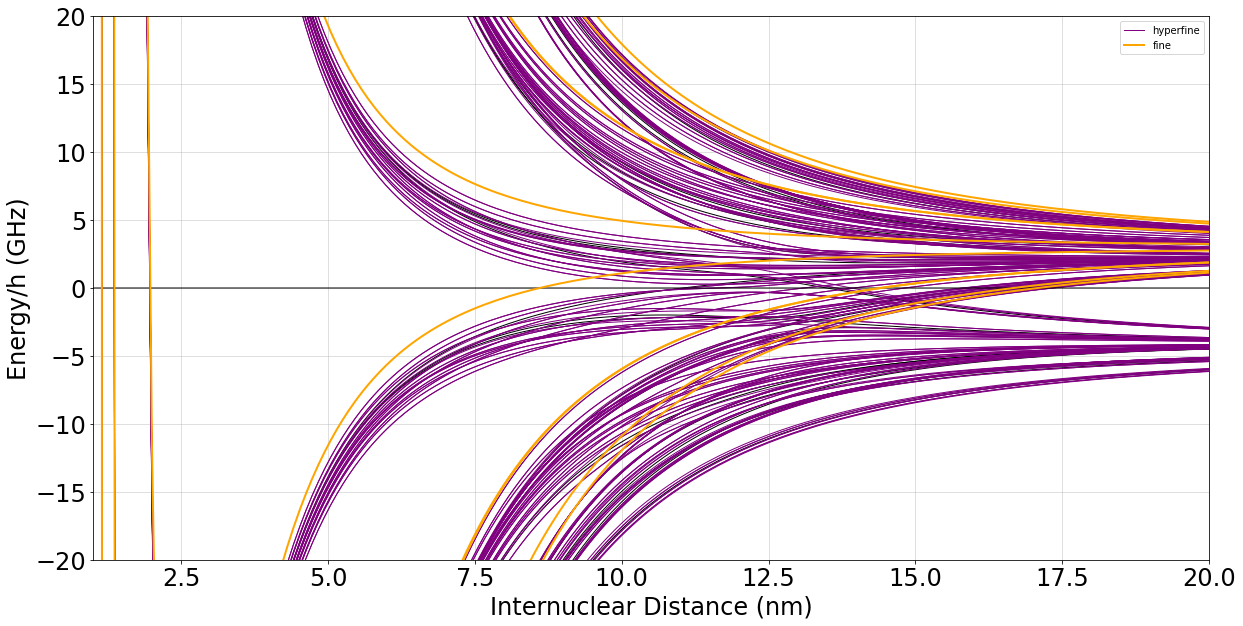

In [58]:
fig, ax = plt.subplots(figsize=(20,10))
fs = 24

fig.subplots_adjust(hspace=0.03, wspace=0.01)

titles = ["D2 Line",  
          r"D2 $f=1$",     r"D2 $f=2$",
          "D1 Line",  
          r"D1 $f=1$",     r"D1 $f=2$"]
allYlims = [(-10,10), 
            (-1,1),    (-1,1),
            (-10,10), 
            (-1,1),    (-1,1)]
yoffsets = np.array(
            [0,
            -mc.Rb87_Ground_ToF1,    -mc.Rb87_Ground_ToF2,
            E_FS_5P12_5P32/mc.h,
            E_FS_5P12_5P32/mc.h-mc.Rb87_Ground_ToF1,E_FS_5P12_5P32/mc.h-mc.Rb87_Ground_ToF2])/1e9
inc=1
labels = ['0a1','0b1','0a2','0b2','1a','1b','2a','2b','3a','3b','4a','4b','5a','5b']
# for num, (ax, title, ylims, yoff) in enumerate(zip(axs, titles, allYlims, yoffsets)):
which = 0
title, ylims, yoff = titles[which], allYlims[which], yoffsets[which]
for label in labels:
    color, linestyle = getLabelColorAndLinestyle(label)
    for datanum, mdata in enumerate(misc.transpose(energies[label])[::inc]):
        ax.plot(Rvals*1e9, np.array(mdata) * 1e-9 / mc.h + yoff , color=color, linestyle='-', linewidth=1, 
                label='hyperfine' if datanum==0 and label=='2b' else None)
leg = ax.legend(fontsize=12, ncol=7, loc='upper center', bbox_to_anchor=(0.5,1.15))
for text in leg.get_texts():
    text.set_color("k")

ax.tick_params(axis='both', which='major', labelsize=fs)

ax.axhline(0,color='k',alpha=0.5)
# ax.text(60,-1.4, title + "\nDissociation Limit", fontsize=fs, color='k')
# ax.set_ylim(*ylims)
# ax.set_xlim(min(Rvals)*1e9,40)
plt.xlim(1,20)
plt.ylim(-20,20)
ax.grid(alpha=0.5)
#if num != len(axs)-1 and num != len(axs)-2 and num != 0:
#    ax.set_xticklabels([]);
#elif num != 0:
ax.set_xlabel('Internuclear Distance (nm)', fontsize=fs)
ax.set_ylabel('Energy/h (GHz)', fontsize=fs)


color = 'orange'
plt.plot(Rval*1e9,H1_e1,color = color,label = 'fine') ### 0^g- in Marks calc
plt.plot(Rval*1e9,H1_e2, color = color)                   ### 0^g- in Marks calc
plt.plot(Rval*1e9,H2_e1,color = color)
plt.plot(Rval*1e9,H2_e2,color = color)
plt.plot(Rval*1e9,H3_e1,color = color) ### 0^g+ in Marks calc
plt.plot(Rval*1e9,H3_e2,color = color)                     ### 0^g+ in Marks calc
plt.plot(Rval*1e9,H4_e1,color = color)
plt.plot(Rval*1e9,H4_e2,color = color)
plt.plot(Rval*1e9,H5_e1,color = color)
plt.plot(Rval*1e9,H5_e2,color = color)
plt.plot(Rval*1e9,H5_e3,color = color)
plt.plot(Rval*1e9,H6_e1,color = color)
plt.plot(Rval*1e9,H6_e2,color = color)
plt.plot(Rval*1e9,H6_e3,color = color)
plt.plot(Rval*1e9,Htot7,color =  color)
plt.plot(Rval*1e9,Htot8,color = color)
# plt.plot(Rval*1e9,Htot9,color = color, label = 'F states')
plt.plot(Rval*1e9,Htot10,color = color)


# shift_2 = 5 #*w*1e-9/mc.h
# plt.plot(Rval*1e9,H1_e1,color = 'limegreen',label = 'fine') ### 0^g- in Marks calc
# plt.plot(Rval*1e9,H1_e2,color = 'limegreen')                   ### 0^g- in Marks calc
# plt.plot(Rval*1e9,H2_e1,color = 'limegreen')
# plt.plot(Rval*1e9,H2_e2,color = 'limegreen')
# plt.plot(Rval*1e9,H3_e1,color = 'limegreen') ### 0^g+ in Marks calc
# plt.plot(Rval*1e9,H3_e2,color = 'limegreen')                     ### 0^g+ in Marks calc
# plt.plot(Rval*1e9,H4_e1,color = 'limegreen')
# plt.plot(Rval*1e9,H4_e2,color = 'limegreen')
# plt.plot(Rval*1e9,H5_e1,color = 'limegreen')
# plt.plot(Rval*1e9,H5_e2,color = 'limegreen')
# plt.plot(Rval*1e9,H5_e3,color = 'limegreen')
# plt.plot(Rval*1e9,H6_e1,color = 'limegreen')
# plt.plot(Rval*1e9,H6_e2,color = 'limegreen')
# plt.plot(Rval*1e9,H6_e3,color = 'limegreen')
# plt.plot(Rval*1e9,Htot7,color =  'limegreen')
# plt.plot(Rval*1e9,Htot8,color = 'limegreen')
# # plt.plot(Rval*1e9,Htot9,color = 'limegreen', label = 'F states')
# plt.plot(Rval*1e9,Htot10,color = 'limegreen')


plt.legend(loc='upper right')
# plt.margins(x=0)
# from matplotlib.pyplot import figure
# fig.savefig('FS.png', dpi=100)


#plt.savefig("D1_Zoomed_Out.svg", dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)

### Just HFS

In [29]:
def getLabelColorAndLinestyle(label):
    phiColors=['purple','blue','green', 'orange','red', '#FF69B4']       
    if label[0] == '0':
        if label[-1] == '1':
            color = 'black'
        elif label[-1] == '2':
            color = '#800080'
    else:
        color = phiColors[int(label[0])]
    linestyle = 'dashed' if label[1] == 'b' else 'solid'
    return color, linestyle

In [30]:
for base in H_hfs_phi.values():
    vals, vecs = np.linalg.eig(base)
    v = np.real(vals)/mc.h/1e12
    print(set(np.round(v*1e6)/1e6))

{0.002261, 0.002333, -0.004345, 0.002053, 0.002869, 0.002757, -0.004502, 0.00249, -0.004782, -0.003965, -0.004078}
{0.002053, 0.002333, -0.004345, 0.002869, 0.002757, -0.004502, 0.00249, -0.004782, -0.004574, -0.003965, -0.004078}
{0.002053, 0.002333, -0.004345, 0.002869, 0.002757, -0.004502, 0.00249, -0.004574, -0.004782, -0.003965, -0.004078}
{0.002053, 0.002261, -0.004345, 0.002869, 0.002757, -0.004502, 0.00249, -0.004782, -0.003965, 0.002333, -0.004078}
{0.002261, 0.002053, -0.004345, 0.002333, 0.002869, 0.002757, -0.004502, 0.00249, -0.004574, -0.004782, -0.003965, -0.004078}
{0.002261, 0.002053, -0.004345, 0.002333, 0.002869, 0.002757, -0.004502, 0.00249, -0.004574, -0.004782, -0.003965, -0.004078}
{0.002053, 0.002261, -0.004345, 0.002333, 0.002869, 0.002757, -0.004502, 0.00249, -0.004782, -0.003965, -0.004078}
{0.002261, 0.002053, -0.004345, 0.002333, 0.002869, 0.002757, -0.004502, 0.00249, -0.004782, -0.003965, -0.004078}
{0.002053, -0.004345, 0.002869, 0.002757, 0.00249, -0.00

In [31]:
for base in H_fs_phi.values():
    vals, vecs = np.linalg.eig(base)
    v = np.real(vals)/mc.h/1e12
    print(set(np.round(v*1e6)/1e6))

{-0.0, -7.123021}
{0.0, -7.123021}
{-0.0, -7.123021}
{-0.0, -7.123021}
{0.0, -7.123021}
{0.0, -7.123021}
{0.0, -7.123021}
{0.0, -7.123021}
{0.0, -7.123021}
{0.0, -7.123021}
{0.0, -7.123021}
{0.0, -7.123021}
{-0.0}
{-0.0}


In [32]:
for label in H_fs_phi.keys():
    H_ = H_fs_phi[label] + H_hfs_phi[label]
    vals, vecs = np.linalg.eig(H_)
    v = np.real(vals)/mc.h/1e12
    print(set(np.round(v*1e6)/1e6))

{0.002261, -0.004345, 0.002757, -0.004502, 0.00249, -7.126986, -7.127803, -7.120152, 0.002333, -7.120968, -0.004078}
{0.002333, -0.004345, 0.002757, -0.004502, 0.00249, -0.004574, -7.126986, -7.127803, -7.120968, -0.004078, -7.120152}
{0.002333, -0.004345, 0.002757, -0.004502, 0.00249, -0.004574, -7.126986, -7.120152, -7.120968, -0.004078, -7.127803}
{0.002261, -0.004345, 0.002757, -0.004502, -7.127803, 0.00249, -7.120152, -7.120968, 0.002333, -7.126986, -0.004078}
{0.002261, 0.002333, -0.004345, -7.120152, 0.002757, -0.004502, 0.00249, -0.004574, -7.126986, -7.120968, -0.004078, -7.127803}
{0.002261, 0.002333, -0.004345, 0.002757, -0.004502, 0.00249, -0.004574, -7.126986, -7.120968, -7.120152, -0.004078, -7.127803}
{0.002261, 0.002333, -0.004345, 0.002757, -0.004502, 0.00249, -7.120968, -7.127803, -7.120152, -0.004078, -7.126986}
{0.002261, 0.002333, -0.004345, 0.002757, -0.004502, 0.00249, -7.126986, -7.120968, -7.120152, -0.004078, -7.127803}
{0.002333, -0.004345, 0.002757, 0.00249,

Text(0, 0.5, 'Energy/h (GHz)')

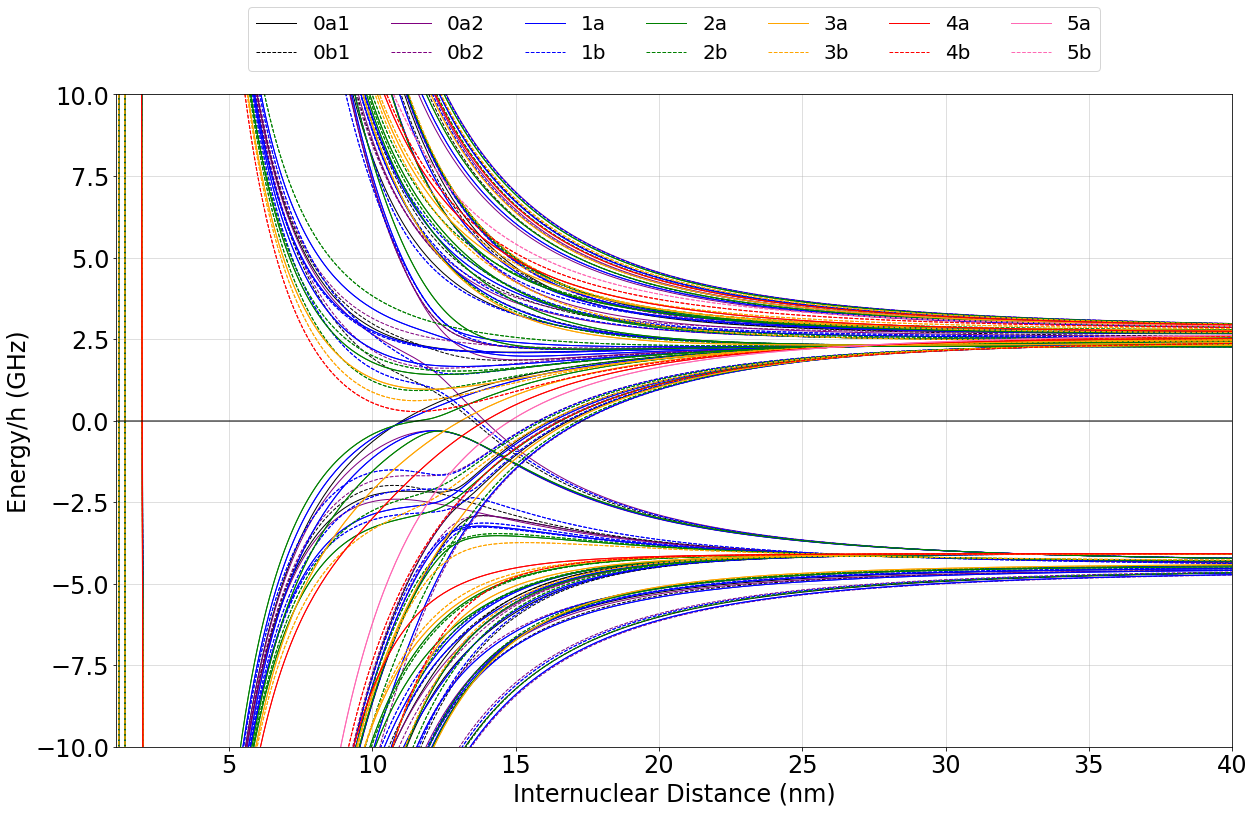

In [35]:
fig, ax = plt.subplots(figsize=(20,12))
fs = 24

fig.subplots_adjust(hspace=0.03, wspace=0.01)

titles = ["D2 Line",  
          r"D2 $f=1$",     r"D2 $f=2$",
          "D1 Line",  
          r"D1 $f=1$",     r"D1 $f=2$"]
allYlims = [(-10,10), 
            (-1,1),    (-1,1),
            (-10,10), 
            (-1,1),    (-1,1)]
yoffsets = np.array(
            [0,
            -mc.Rb87_Ground_ToF1,    -mc.Rb87_Ground_ToF2,
            E_FS_5P12_5P32/mc.h,
            E_FS_5P12_5P32/mc.h-mc.Rb87_Ground_ToF1,E_FS_5P12_5P32/mc.h-mc.Rb87_Ground_ToF2])/1e9
inc=1
labels = ['0a1','0b1','0a2','0b2','1a','1b','2a','2b','3a','3b','4a','4b','5a','5b']
#for num, (ax, title, ylims, yoff) in enumerate(zip(axs, titles, allYlims, yoffsets)):
which = 0
title, ylims, yoff = titles[which], allYlims[which], yoffsets[which]
for label in labels:
    color, linestyle = getLabelColorAndLinestyle(label)
    for datanum, mdata in enumerate(misc.transpose(energies[label])[::inc]):
        ax.plot(Rvals*1e9, np.array(mdata) * 1e-9 / mc.h + yoff , color=color, linestyle=linestyle, linewidth=1, 
                label=label if datanum==0 else None)
leg = ax.legend(fontsize=20, ncol=7, loc='upper center', bbox_to_anchor=(0.5,1.15))
for text in leg.get_texts():
    text.set_color("k")

ax.tick_params(axis='both', which='major', labelsize=fs)

ax.axhline(0,color='k',alpha=0.5)
# ax.text(60,-1.4, title + "\nDissociation Limit", fontsize=fs, color='k')
ax.set_ylim(*ylims)
ax.set_xlim(min(Rvals)*1e9,40)
ax.grid(alpha=0.5)
#if num != len(axs)-1 and num != len(axs)-2 and num != 0:
#    ax.set_xticklabels([]);
#elif num != 0:
ax.set_xlabel('Internuclear Distance (nm)', fontsize=fs)
ax.set_ylabel('Energy/h (GHz)', fontsize=fs)
#plt.savefig("D1_Zoomed_Out.svg", dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)

### D2 animation

In [ ]:
titles = ["D2 Line",  
          r"D2 $f=1$",     r"D2 $f=2$",
          "D1 Line",  
          r"D1 $f=1$",     r"D1 $f=2$"]
allYlims = [(-10,10), 
            (-1,1),    (-1,1),
            (-10,10), 
            (-1,1),    (-1,1)]
yoffsets = np.array(
            [0,
            -mc.Rb87_Ground_ToF1,    -mc.Rb87_Ground_ToF2,
            E_FS_5P12_5P32/mc.h,
            E_FS_5P12_5P32/mc.h-mc.Rb87_Ground_ToF1,E_FS_5P12_5P32/mc.h-mc.Rb87_Ground_ToF2])/1e9
inc=1
labels = ['0a1','0b1','0a2','0b2','1a','1b','2a','2b','3a','3b','4a','4b','5a','5b']
#for num, (ax, title, ylims, yoff) in enumerate(zip(axs, titles, allYlims, yoffsets)):
which = 0
title, ylims, yoff = titles[which], allYlims[which], yoffsets[which]
%matplotlib
labelDelay = 50
ptsPerLabel = 200
totalPts = (ptsPerLabel-labelDelay)*(len(labels)-1)+ptsPerLabel
print(totalPts)
st = time.time()
for ptNum in range(totalPts):
    misc.loopProgress(ptNum, totalPts)
    fig, ax = plt.subplots(figsize=(10,6))
    for labeln, label in enumerate(labels):
        thisDelay = labelDelay * labeln
        minRPt = ptsPerLabel - (ptNum - thisDelay)
        #print(label, minRPt, thisDelay)
        if minRPt > len(Rvals):
            continue
        if minRPt < 0:
            minRPt = 0
        minRCoord = int(minRPt / ptsPerLabel * len(Rvals))
        color, linestyle = getLabelColorAndLinestyle(label)
        for datanum, mdata in enumerate(misc.transpose(energies[label])[::inc]):
            ax.plot( Rvals[minRCoord:]*1e9, np.array(mdata[minRCoord:]) * 1e-9 / mc.h + yoff , color=color, linestyle=linestyle, linewidth=1, 
                     label=label if datanum==0 else None )
    ax.axhline(0,color='k',alpha=0.5)
    ax.set_ylim(*ylims)
    ax.set_xlim(min(Rvals)*1e9,max(Rvals)*1e9)
    ax.grid(alpha=0)
    ax.axis(False)
    plt.savefig('D2AnimationStorage/'+str(ptNum)+'.png', bbox_inches='tight',dpi=200)
    plt.close(fig)
%matplotlib inline
#ax.set_xlabel('Internuclear Distance (nm)', fontsize=fs)
#ax.set_ylabel('Energy/h (GHz)', fontsize=fs)

In [ ]:
import time
import os
import cv2
def makeVideoFromFolderPics(folder, video_name, repNums, fps=30):
    images = [img for img in os.listdir(folder) if img.endswith(".png")]
    images.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    
    frame = cv2.imread(os.path.join(folder, images[0]))
    height, width, layers = frame.shape
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    if os.path.isfile(video_name) :
        raise ValueError('Video File Already Exists!')
    
    video = cv2.VideoWriter(video_name, fourcc, fps, (width,height))

    st = time.time()
    if repNums is None:
        repetitions = [1 for _ in images]
    else:
        repetitions = list(repNums.values())
    print(images)
    for imn, (filename, repeat) in enumerate(zip(images, repetitions)):
        for _ in range(repeat):
            frame = cv2.imread(os.path.join(folder, filename))
            if frame is None:
                cv2.destroyAllWindows()
                video.release()
                raise ValueError('Failed to open file',filename)
            if height != frame.shape[0] or width != frame.shape[1]:
                cv2.destroyAllWindows()
                video.release()
                raise ValueError('Size of frame ' + str(imn) + "doesn't match frame 0!" + str(frame.shape), str((width,height)))
            video.write(frame)

    cv2.destroyAllWindows()
    video.release()

In [ ]:
makeVideoFromFolderPics('D2AnimationStorage','D2Animation.mp4', None)

### Paper Zoomed Out

In [ ]:
mpl.rcParams['figure.dpi']=300
mpl.rcParams['font.size']=8
mpl.rcParams['text.usetex']=True

In [ ]:
fig = plt.figure(figsize=(7,3))
gs = fig.add_gridspec(2,3)
axs = []
axs.append(fig.add_subplot(gs[0, 0]))
axs.append(fig.add_subplot(gs[0, 1]))
axs.append(fig.add_subplot(gs[0, 2]))
axs.append(fig.add_subplot(gs[1, 0]))
axs.append(fig.add_subplot(gs[1, 1]))
axs.append(fig.add_subplot(gs[1, 2]))

fig.subplots_adjust(hspace=0.03, wspace=0.01)

letterlabels = ['a','b','c','d','e','f']
titles = ["D2 Line",  
          r"D2 $f=1$",     r"D2 $f=2$",
          "D1 Line",  
          r"D1 $f=1$",     r"D1 $f=2$"]
allYlims = [(-10,10), 
            (-1,1),    (-1,1),
            (-10,10), 
            (-1,1),    (-1,1)]
yoffsets = np.array(
            [0,
            -mc.Rb87_Ground_ToF1,    -mc.Rb87_Ground_ToF2,
            E_FS_5P12_5P32/mc.h,
            E_FS_5P12_5P32/mc.h-mc.Rb87_Ground_ToF1,   E_FS_5P12_5P32/mc.h-mc.Rb87_Ground_ToF2])/1e9
inc=1
labels = ['0a1','0b1','0a2','0b2','1a','1b','2a','2b','3a','3b','4a','4b','5a','5b']
leglabels = ['0^+_+','0^{+}_{-}','0^-_+','0^-_{-}','1_+','1_-','2_+','2_-','3_+','3_-','4_+','4_-','5_+','5_-']
for num, (ax, title, ylims, yoff) in enumerate(zip(axs, titles, allYlims, yoffsets)):
    for labeln, label in enumerate(labels):
        color, linestyle = getLabelColorAndLinestyle(label)
        for datanum, mdata in enumerate(misc.transpose(energies[label])[::inc]):
            ax.plot(Rvals*1e9, np.array(mdata) * 1e-9 / mc.h + yoff , color=color, linestyle=linestyle, linewidth=0.5, 
                    label='$'+leglabels[labeln]+'$' if datanum==0 else None)
    ax.axhline(0,color='k',alpha=0.5, lw=1)
    ax.text(0.75,0.52, title, fontsize=6, color='k', transform=ax.transAxes)
    ax.set_ylim(*ylims)
    if num in [0, 3]:
        ax.set_xlim(0,30)
        ax.set_xticks([0, 10, 20, 30])
    else:
        ax.set_xlim(min(Rvals)*1e9,max(Rvals)*1e9)
        ax.set_xticks([0, 25, 50, 75, 100])
    ax.grid(alpha=0.5)
    if num in [1,2,4,5]:
        ax.set_yticks([-1, -0.5, 0, 0.5, 1])
        if num in [2,5]:
            ax.set_yticklabels([])
    elif num in [0,3]:
        ax.set_yticks([-10, -5, 0, 5, 10])
    else:
        ax.set_yticks([])
    #
    if num in [0,1,2]:
        ax.set_xticklabels([]);
    elif num != 0:
        #ax.set_xlabel('Internuclear Distance (nm)', fontsize=8)
        pass
    ax.text(0.95,0.9,r'$\textbf{'+letterlabels[num]+r'}$',transform=ax.transAxes)

leg = axs[1].legend(fontsize=6, ncol=7, loc='upper center', bbox_to_anchor=(0.5,1.4))
for text in leg.get_texts():
    text.set_color("k")

fig.subplots_adjust(wspace=0.2, hspace=0.1)

fig.text(0.05, 0.5, 'Energy (GHz)', rotation=90, verticalAlignment='center')
fig.text(0.5, 0.0, 'Internuclear Separation (nm)', rotation=0, horizontalAlignment='center')


yo = -yoffsets[1]
axs[0].plot([29,30],[yo+1,yo+1], lw=2,color='k')
axs[0].plot([29,30],[yo-1,yo-1], lw=2,color='k')
yo = -yoffsets[2]
axs[0].plot([29,30],[yo+1,yo+1], lw=2,color='k')
axs[0].plot([29,30],[yo-1,yo-1], lw=2,color='k')


yo = yoffsets[3]-yoffsets[4]
axs[3].plot([29,30],[yo+1,yo+1], lw=2,color='k')
axs[3].plot([29,30],[yo-1,yo-1], lw=2,color='k')
yo = yoffsets[3]-yoffsets[5]
axs[3].plot([29,30],[yo+1,yo+1], lw=2,color='k')
axs[3].plot([29,30],[yo-1,yo-1], lw=2,color='k')

for ax in axs:
    ax.tick_params(direction='in')

print('Saving Fig...')
plt.savefig("Paper_Hyperfine_Zoomed_Out.svg", dpi=600, bbox_inches='tight')
print('Rendering...')

### Paper Zoomed In

In [ ]:
mpl.rcParams['figure.dpi']=200

In [ ]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['stixsans']
mpl.rcParams['font.size'] = 7
mpl.rcParams['text.latex.preamble'] = r'\usepackage[eulergreek]{sansmath}\sansmath'

fig = plt.figure(figsize=(7,7))
gs = fig.add_gridspec(3,2)

axs = []

for i1, i2 in zip([0,0,1,1,2,2], [0,1,0,1,0,1]):
    axs.append(fig.add_subplot(gs[i1,i2]))
    
fig.subplots_adjust(hspace=0.08, wspace=0.01)

titles = [ r"D2 $f=1,f'=2$", r"D2 $f=2,f'=2$",
           r"D1 $f=1,f'=2$", r"D1 $f=2,f'=2$", 
           r"D1 $f=1,f'=1$", r"D1 $f=2,f'=1$"]

allYlims = [(-0.1,0.1), (-0.1,0.1), 
            (-0.1,0.1), (-0.1,0.1), 
            (-0.1,0.1), (-0.1,0.1)]

DeltaVal = mc.h*(mc.Rb87_D2LineFrequency-mc.Rb87_D1LineFrequency)# / mc.h

yoffsets = np.array([-mc.Rb87_Ground_ToF1-mc.Rb87_5P32_ToF2,-mc.Rb87_Ground_ToF2-mc.Rb87_5P32_ToF2,
                     -mc.Rb87_Ground_ToF1-mc.Rb87_5P12_ToF2+DeltaVal/mc.h,-mc.Rb87_Ground_ToF2-mc.Rb87_5P12_ToF2+DeltaVal/mc.h,
                     -mc.Rb87_Ground_ToF1-mc.Rb87_5P12_ToF1+DeltaVal/mc.h,-mc.Rb87_Ground_ToF2-mc.Rb87_5P12_ToF1+DeltaVal/mc.h])/1e9
inc=1
labels = ['0a1','0b1','0a2','0b2','1a','1b','2a','2b','3a','3b','4a','4b','5a','5b']
leglabels = ['0^+_+','0^{+}_{-}','0^-_+','0^-_{-}','1_+','1_-','2_+','2_-','3_+','3_-','4_+','4_-','5_+','5_-']
figLabels = ['a','b','c','d','e','f']

for num, (ax, title, ylims, yoff) in enumerate(zip(axs[:], titles, allYlims, yoffsets)):
    for labeln, label in enumerate(labels):
        color, linestyle = getLabelColorAndLinestyle(label)
        numStatesStr = " ("+ str(len(allBases[label])) + ")" if label[0] == '0' else " ("+ str(int(len(allBases[label])/2)) + ")"
        for datanum, mdata in enumerate(misc.transpose(energies[label])[::inc]):
            ax.plot(Rvals*1e9, np.array(mdata) * 1e-9 / mc.h + yoff , color=color, linestyle=linestyle, linewidth=0.5, 
                    label='$'+leglabels[labeln]+'$' if datanum==0 else None)
    if num == 0:
        leg = ax.legend(ncol=7, loc='upper center', bbox_to_anchor=(1,1.28))
        for text in leg.get_texts():
            text.set_color("k")
    ax.axhline(0,color='k',alpha=0.5, linewidth=1)
    ax.text(75, 0.02, title + "\nDissociation Limit", color='k')
    ax.text(102, 0.09, r'\textbf{' + figLabels[num] + '}')
    ax.set_ylim(*ylims)
    ax.set_xlim(min(Rvals)*1e9,max(Rvals)*1e9)
    ax.grid(alpha=0.5)
    if num != len(axs)-1 and num != len(axs)-2:
        ax.set_xticklabels([]);
    if num % 2 == 1:
        ax.set_yticklabels([])
    ax.set_yticks([-0.1,-0.05,0,0.05,0.1])
    ax.tick_params(axis='both', which='major', direction='in',length=2)

fig.text(0.5,  0.07, r'Internuclear Distance (nm)', ha='center')
fig.text(0.05, 0.5,  r'Energy (GHz)', rotation=90, va='center')
plt.savefig("Paper_Hyperfine_Zoomed_In.png", dpi=600, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(30,20))
gs = fig.add_gridspec(2,2)
axs = []
for i1, i2 in zip([0,0,1,1], [0,1,0,1]):
    axs.append(fig.add_subplot(gs[i1,i2]))
fig.subplots_adjust(hspace=0.025, wspace=0.01)

titles = [r"D1 $f=1,f'=2$",r"D1 $f=2,f'=2$",
          r"D1 $f=1,f'=1$",r"D1 $f=2,f'=1$"]

allYlims = np.array(
           [(-0.3,0.3),  (-0.3,0.3),
            (-0.3,0.3),  (-0.3,0.3)])
yoffsets = np.array(         
            [-mc.Rb87_Ground_ToF1-mc.Rb87_5P12_ToF2,-mc.Rb87_Ground_ToF2-mc.Rb87_5P12_ToF2,
             -mc.Rb87_Ground_ToF1-mc.Rb87_5P12_ToF1,-mc.Rb87_Ground_ToF2-mc.Rb87_5P12_ToF1])/1e9
DeltaVal = mc.h*(mc.Rb87_D2LineFrequency-mc.Rb87_D1LineFrequency)# / mc.h
yoffsets += DeltaVal/mc.h/1e9
phiColors = ['r' for _ in range(20)]
inc=1
for num, (ax, title, ylims, yoff) in enumerate(zip(axs, titles, allYlims, yoffsets)):
    for label, base in symmetrizedBases.items():
        color = phiColors[int(label[0])]
        linestyle = '-' if label[-1] == 'a' else '-.'
        for datanum, mdata in enumerate(misc.transpose(energies[label])[::inc]):
            ax.plot(Rvals*1e9, np.array(mdata) * 1e-9 / mc.h + yoff , color=color, linestyle=linestyle, linewidth=1, 
                    label=label if datanum==0 else None)
    leg = ax.legend(fontsize=18, ncol=3, loc='upper right')
    for text in leg.get_texts():
        text.set_color("k")

    ax.axhline(0,color='k',alpha=0.5)
    ax.text(70,0.05, title + "\nDissociation Limit", fontsize=20, color='k')
    ax.set_ylim(*ylims)
    ax.set_xlim(0,100)
    ax.grid(alpha=1)
    if num != len(axs)-1 and num != len(axs)-2:
        ax.set_xticklabels([]);
    elif num != 0:
        ax.set_xlabel('Internuclear Distance (nm)')
    if num % 2 == 1:
        ax.set_yticklabels([]);
    else:
        ax.set_ylabel('Energy (GHz)')
#plt.savefig("Symmetrized_Hyperfine_Splitting_D1_Zoom.png", dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)

### Zoomed out D1 & D2

In [ ]:
fig = plt.figure(figsize=(30,60))
gs = fig.add_gridspec(6,2)
axs = []
axs.append(fig.add_subplot(gs[0, :]))
axs.append(fig.add_subplot(gs[1, 0]))
axs.append(fig.add_subplot(gs[1, 1]))
axs.append(fig.add_subplot(gs[2, :]))
axs.append(fig.add_subplot(gs[3, 0]))
axs.append(fig.add_subplot(gs[3, 1]))

fig.subplots_adjust(hspace=0.03, wspace=0.01)

titles = ["D2 Line",  
          r"D2 $f=1$",     r"D2 $f=2$",
          "D1 Line",  
          r"D1 $f=1$",     r"D1 $f=2$"]
allYlims = [(-10,10), 
            (-1,1),    (-1,1),
            (-10,10), 
            (-1,1),    (-1,1)]
yoffsets = np.array(
            [0,
            -mc.Rb87_Ground_ToF1,    -mc.Rb87_Ground_ToF2,
            E_FS_5P12_5P32/mc.h,
            E_FS_5P12_5P32/mc.h-mc.Rb87_Ground_ToF1,E_FS_5P12_5P32/mc.h-mc.Rb87_Ground_ToF2])/1e9
inc=1
labels = ['0a1','0b1','0a2','0b2','1a','1b','2a','2b','3a','3b','4a','4b','5a','5b']
for num, (ax, title, ylims, yoff) in enumerate(zip(axs, titles, allYlims, yoffsets)):
    for label in labels:
        color, linestyle = getLabelColorAndLinestyle(label)
        for datanum, mdata in enumerate(misc.transpose(energies[label])[::inc]):
            ax.plot(Rvals*1e9, np.array(mdata) * 1e-9 / mc.h + yoff , color=color, linestyle=linestyle, linewidth=1, 
                    label=label if datanum==0 else None)
    if num == 0:
        leg = ax.legend(fontsize=18, ncol=7, loc='upper center', bbox_to_anchor=(0.5,1.15))
        for text in leg.get_texts():
            text.set_color("k")
    ax.axhline(0,color='k',alpha=0.5)
    ax.text(80,0.01, title + "\nDissociation Limit", fontsize=20, color='k')
    ax.set_ylim(*ylims)
    ax.set_xlim(min(Rvals)*1e9,max(Rvals)*1e9)
    ax.grid(alpha=0.5)
    if num != len(axs)-1 and num != len(axs)-2 and num != 0:
        ax.set_xticklabels([]);
    elif num != 0:
        ax.set_xlabel('Internuclear Distance (nm)', fontsize=16)
    if num not in [0,1, 3,4]:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel('Energy (GHz)', fontsize=16)
#plt.savefig("Symmetrized_Hyperfine_Splitting_Big_Picture.svg", dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)

In [ ]:
fig = plt.figure(figsize=(20,10))
axs = []
axs.append(fig.add_subplot())

fig.subplots_adjust(hspace=0.03, wspace=0.01)

titles = ["D2 Line",  
          r"D2 $f=1$",     r"D2 $f=2$",
          "D1 Line",  
          r"D1 $f=1$",     r"D1 $f=2$"]
allYlims = [(-10,10), 
            (-1,1),    (-1,1),
            (-10,10), 
            (-1,1),    (-1,1)]
yoffsets = np.array(
            [0,
            -mc.Rb87_Ground_ToF1,    -mc.Rb87_Ground_ToF2,
            E_FS_5P12_5P32/mc.h,
            E_FS_5P12_5P32/mc.h-mc.Rb87_Ground_ToF1,E_FS_5P12_5P32/mc.h-mc.Rb87_Ground_ToF2])/1e9
inc=1
labels = ['0a1','0b1','0a2','0b2','1a','1b','2a','2b','3a','3b','4a','4b','5a','5b']
which = 3
num = 0
(ax, title, ylims, yoff) = axs[0], titles[which], allYlims[which], yoffsets[which]
for label in labels:
    color, linestyle = getLabelColorAndLinestyle(label)
    for datanum, mdata in enumerate(misc.transpose(energies[label])[::inc]):
        ax.plot(Rvals*1e9, np.array(mdata) * 1e-9 / mc.h + yoff , color=color, linestyle=linestyle, linewidth=1, 
                label=label if datanum==0 else None)
if num == 0:
    leg = ax.legend(ncol=7, loc='upper center', bbox_to_anchor=(0.5,1.15),facecolor='#FFFFFF00')
    for text in leg.get_texts():
        text.set_color("k")
ax.axhline(0,color='k',alpha=0.5)
ax.text(80,0.01, title + "\nDissociation Limit", fontsize=20, color='k')
ax.set_ylim(*ylims)
ax.set_xlim(min(Rvals)*1e9,max(Rvals)*1e9)
ax.grid(alpha=0.5)
if num != len(axs)-1 and num != len(axs)-2 and num != 0:
    ax.set_xticklabels([]);
elif num == 0:
    ax.set_xlabel('Internuclear Distance (nm)', fontsize=16)
if num not in [0,1, 3,4]:
    ax.set_yticklabels([])
else:
    ax.set_ylabel('Energy (GHz)', fontsize=16)

# plt.savefig("Single_D1.png", dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)


In [ ]:
fig = plt.figure(figsize=(20,10))
axs = []
axs.append(fig.add_subplot())

fig.subplots_adjust(hspace=0.03, wspace=0.01)

titles = ["D2 Line",  
          r"D2 $f=1$",     r"D2 $f=2$",
          "D1 Line",  
          r"D1 $f=1$",     r"D1 $f=2$"]
allYlims = [(-10,10), 
            (-1,1),    (-1,1),
            (-10,10), 
            (-1,1),    (-1,1)]
yoffsets = np.array(
            [0,
            -mc.Rb87_Ground_ToF1,    -mc.Rb87_Ground_ToF2,
            E_FS_5P12_5P32/mc.h,
            E_FS_5P12_5P32/mc.h-mc.Rb87_Ground_ToF1,E_FS_5P12_5P32/mc.h-mc.Rb87_Ground_ToF2])/1e9
inc=1
labels = ['0a1','0b1','0a2','0b2','1a','1b','2a','2b','3a','3b','4a','4b','5a','5b']
which = 3
num = 0
(ax, title, ylims, yoff) = axs[0], titles[which], allYlims[which], yoffsets[which]
for label in labels:
    color, linestyle = getLabelColorAndLinestyle(label)
    for datanum, mdata in enumerate(misc.transpose(energies[label])[::inc]):
        ax.plot(Rvals*1e9, np.array(mdata) * 1e-9 / mc.h + yoff , color=color, linestyle=linestyle, linewidth=1, 
                label=label if datanum==0 else None)
if num == 0:
    leg = ax.legend(fontsize=18, ncol=7, loc='upper center', bbox_to_anchor=(0.5,1.15),facecolor='#FFFFFF00')
    for text in leg.get_texts():
        text.set_color("k")
ax.axhline(0,color='k',alpha=0.5)
ax.text(80,0.01, title + "\nDissociation Limit", fontsize=20, color='k')
ax.set_ylim(*ylims)
ax.set_xlim(min(Rvals)*1e9,max(Rvals)*1e9)
ax.grid(alpha=0.5)
if num != len(axs)-1 and num != len(axs)-2 and num != 0:
    ax.set_xticklabels([]);
elif num == 0:
    ax.set_xlabel('Internuclear Distance (nm)', fontsize=16)
if num not in [0,1, 3,4]:
    ax.set_yticklabels([])
else:
    ax.set_ylabel('Energy (GHz)', fontsize=16)
#plt.savefig("Single_D1.png", dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)

### D2 Zoomed In

In [ ]:
fig = plt.figure(figsize=(30,35))
gs = fig.add_gridspec(4,2)
fs = 24
axs = []
for i1, i2 in zip([0,0,1,1,2,2,3,3], [0,1,0,1,0,1,0,1]):
    axs.append(fig.add_subplot(gs[i1,i2]))
fig.subplots_adjust(hspace=0.03, wspace=0.01)

titles = [r"D2 $f=1,f'=3$",r"D2 $f=2,f'=3$",
          r"D2 $f=1,f'=2$",r"D2 $f=2,f'=2$",
          r"D2 $f=1,f'=1$",r"D2 $f=2,f'=1$",
          r"D2 $f=1,f'=0$",r"D2 $f=2,f'=0$"]

allYlims = [(-0.1,0.1), (-0.1,0.1),
            (-0.1,0.1), (-0.1,0.1),
            (-0.1,0.1), (-0.1,0.1),
            (-0.1,0.1), (-0.1,0.1),]
yoffsets = np.array(
            [-mc.Rb87_Ground_ToF1-mc.Rb87_5P32_ToF3,-mc.Rb87_Ground_ToF2-mc.Rb87_5P32_ToF3,
             -mc.Rb87_Ground_ToF1-mc.Rb87_5P32_ToF2,-mc.Rb87_Ground_ToF2-mc.Rb87_5P32_ToF2,
             -mc.Rb87_Ground_ToF1-mc.Rb87_5P32_ToF1,-mc.Rb87_Ground_ToF2-mc.Rb87_5P32_ToF1,
             -mc.Rb87_Ground_ToF1-mc.Rb87_5P32_ToF0,-mc.Rb87_Ground_ToF2-mc.Rb87_5P32_ToF0])/1e9

inc=1
for num, (ax, title, ylims, yoff) in enumerate(zip(axs[:], titles, allYlims, yoffsets)):
    for label in labels:
        color, linestyle = getLabelColorAndLinestyle(label)
        numStatesStr = " ("+ str(len(allBases[label])) + ")" if label[0] == '0' else " ("+ str(int(len(allBases[label])/2)) + ")"
        for datanum, mdata in enumerate(misc.transpose(energies[label])[::inc]):
            ax.plot(Rvals*1e9, np.array(mdata) * 1e-9 / mc.h + yoff , color=color, linestyle=linestyle, linewidth=1, 
                    label=label + numStatesStr if datanum==0 else None)
    if num == 0:
        leg = ax.legend(fontsize=18, ncol=7, loc='upper center', bbox_to_anchor=(1,1.15))
        for text in leg.get_texts():
            text.set_color("k")
    ax.axhline(0,color='k',alpha=0.5, linewidth=2)
    ax.text(80,0.01, title + "\nDissociation Limit", fontsize=20, color='k')
    ax.set_ylim(*ylims)
    ax.set_xlim(min(Rvals)*1e9,max(Rvals)*1e9)
    ax.grid(alpha=0.5)
    if num != len(axs)-1 and num != len(axs)-2:
        ax.set_xticklabels([]);
    elif num != 0:
        ax.set_xlabel('Internuclear Distance (nm)', fontsize=fs)
    if num % 2 == 1:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel('Energy (GHz)', fontsize=fs)
    ax.tick_params(axis='both', which='major', labelsize=fs)
#plt.savefig("Symmetrized_Hyperfine_Splitting_D2_Zoom.png", dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)

### Single Excited States

## d2

In [ ]:
fig = plt.figure(figsize=(7,3))
gs = fig.add_gridspec(1,2)
fs = 24
axs = []
axs.append(fig.add_subplot(gs[0]))
axs.append(fig.add_subplot(gs[1]))

fig.subplots_adjust(hspace=0.03, wspace=0.01)

titles = [r"D2 $f=1,f'=2$",r"D2 $f=2,f'=2$"]

allYlims = [(-0.1,0.1), (-0.1,0.1)]

yoffsets = np.array([-mc.Rb87_Ground_ToF1-mc.Rb87_5P32_ToF2,-mc.Rb87_Ground_ToF2-mc.Rb87_5P32_ToF2])/1e9

inc=1
for num, (ax, title, ylims, yoff) in enumerate(zip(axs[:], titles, allYlims, yoffsets)):
    for label in labels:
        color, linestyle = getLabelColorAndLinestyle(label)
        numStatesStr = " ("+ str(len(allBases[label])) + ")" if label[0] == '0' else " ("+ str(int(len(allBases[label])/2)) + ")"
        for datanum, mdata in enumerate(misc.transpose(energies[label])[::inc]):
            ax.plot(Rvals*1e9, np.array(mdata) * 1e-9 / mc.h + yoff , color=color, linestyle=linestyle, linewidth=1, 
                    label=label + numStatesStr if datanum==0 else None)
    if num == 0:
        leg = ax.legend(fontsize=18, ncol=7, loc='upper center', bbox_to_anchor=(1,1.15))
        for text in leg.get_texts():
            text.set_color("k")
    ax.axhline(0,color='k',alpha=0.5, linewidth=2)
    ax.text(80,0.01, title + "\nDissociation Limit", fontsize=20, color='k')
    ax.set_ylim(*ylims)
    ax.set_xlim(min(Rvals)*1e9,max(Rvals)*1e9)
    ax.grid(alpha=0.5)
    if num != len(axs)-1 and num != len(axs)-2:
        ax.set_xticklabels([]);
    elif num != 0:
        ax.set_xlabel('Internuclear Distance (nm)', fontsize=fs)
    if num % 2 == 1:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel('Energy (GHz)', fontsize=fs)
    ax.tick_params(axis='both', which='major', labelsize=fs)
#plt.savefig("Symmetrized_Hyperfine_Splitting_D2_Zoom.png", dpi=100, transparent=True, bbox_inches='tight', pad_inches=0)

In [ ]:
mpl.rcParams['figure.dpi']=200

In [ ]:
fig = plt.figure(figsize=(7,3))
gs = fig.add_gridspec(1,2)

axs = []

axs.append(fig.add_subplot(gs[0]))
axs.append(fig.add_subplot(gs[1]))
    
fig.subplots_adjust(hspace=0.08, wspace=0.01)

titles = [ r"D2 $f=1,f'=2$", r"D2 $f=2,f'=2$",
           r"D1 $f=1,f'=2$", r"D1 $f=2,f'=2$", 
           r"D1 $f=1,f'=1$", r"D1 $f=2,f'=1$"]

allYlims = [(-0.1,0.1), (-0.1,0.1), 
            (-0.1,0.1), (-0.1,0.1), 
            (-0.1,0.1), (-0.1,0.1)]

DeltaVal = mc.h*(mc.Rb87_D2LineFrequency-mc.Rb87_D1LineFrequency)# / mc.h

yoffsets = np.array([-mc.Rb87_Ground_ToF1-mc.Rb87_5P32_ToF2,-mc.Rb87_Ground_ToF2-mc.Rb87_5P32_ToF2,
                     -mc.Rb87_Ground_ToF1-mc.Rb87_5P12_ToF2+DeltaVal/mc.h,-mc.Rb87_Ground_ToF2-mc.Rb87_5P12_ToF2+DeltaVal/mc.h,
                     -mc.Rb87_Ground_ToF1-mc.Rb87_5P12_ToF1+DeltaVal/mc.h,-mc.Rb87_Ground_ToF2-mc.Rb87_5P12_ToF1+DeltaVal/mc.h])/1e9
inc=1
labels = ['0a1','0b1','0a2','0b2','1a','1b','2a','2b','3a','3b','4a','4b','5a','5b']
leglabels = ['0^+_+','0^{+}_{-}','0^-_+','0^-_{-}','1_+','1_-','2_+','2_-','3_+','3_-','4_+','4_-','5_+','5_-']
figLabels = ['a','b','c','d','e','f']

wh = [4,5]

for num, (ax, title, ylims, yoff) in enumerate(zip(axs[:], [titles[wh[0]],titles[wh[1]]], 
                                                   [allYlims[wh[0]],allYlims[wh[1]]], [yoffsets[wh[0]], yoffsets[wh[1]]])):
    for labeln, label in enumerate(labels):
        color, linestyle = getLabelColorAndLinestyle(label)
        numStatesStr = " ("+ str(len(allBases[label])) + ")" if label[0] == '0' else " ("+ str(int(len(allBases[label])/2)) + ")"
        for datanum, mdata in enumerate(misc.transpose(energies[label])[::inc]):
            ax.plot(Rvals*1e9, np.array(mdata) * 1e-9 / mc.h + yoff , color=color, linestyle=linestyle, linewidth=0.5, 
                    label='$'+leglabels[labeln]+'$' if datanum==0 else None)
    if num == 0:
        leg = ax.legend(ncol=7, loc='upper center', bbox_to_anchor=(1,1.2))
        for text in leg.get_texts():
            text.set_color("k")
    ax.axhline(0,color='k',alpha=0.5, linewidth=1)
    ax.text(75, 0.02, title + "\nDissociation Limit", color='k')
    #ax.text(102, 0.09, r'\textbf{' + figLabels[num] + '}')
    ax.set_ylim(*ylims)
    ax.set_xlim(min(Rvals)*1e9,max(Rvals)*1e9)
    ax.grid(alpha=0.5)
    if num != len(axs)-1 and num != len(axs)-2:
        ax.set_xticklabels([]);
    if num % 2 == 1:
        ax.set_yticklabels([])
    ax.set_yticks([-0.1,-0.05,0,0.05,0.1])
    ax.tick_params(axis='both', which='major', direction='in',length=2)

fig.text(0.5,  0.03, r'Internuclear Distance (nm)', ha='center')
fig.text(0.05, 0.5,  r'Energy (GHz)', rotation=90, va='center')
#plt.savefig("Paper_Hyperfine_Zoomed_In.png", dpi=600, bbox_inches='tight')

In [ ]:
400/580

In [ ]:
600/580